In [3]:
import os
import sys
import json
import time
import datetime
from importlib import reload

import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import external as ext

import seaborn as sns
%matplotlib inline

In [27]:
### Heatmap dataframe

In [5]:
#  "Desert_Main": "Miramar", 0 - 816,000
desert_main = pd.DataFrame(columns=list(range(0,817)),index=list(range(0,817)))
desert_main = desert_main.fillna(0)
desert_main_count = 0

#  "Baltic_Main": "Erangel (Remastered)", 0 - 816,000
baltic_main = pd.DataFrame(columns=list(range(0,817)),index=list(range(0,817)))
baltic_main = baltic_main.fillna(0)
baltic_main_count = 0

#  "Savage_Main": "Sanhok", 0 - 408,000
savage_main = pd.DataFrame(columns=list(range(0,409)),index=list(range(0,409)))
savage_main = savage_main.fillna(0)
savage_main_count = 0

#  "Summerland_Main": "Karakin" 0 - 204,000
summerland_main = pd.DataFrame(columns=list(range(0,205)),index=list(range(0,205)))
summerland_main = summerland_main.fillna(0)
summerland_main_count = 0

In [6]:
def heatmap(x,y,mapname):
    if mapname == 'Desert_Main':
        desert_main.iloc[y,x] = desert_main.iloc[y,x] + 1
      
    elif mapname == 'Baltic_Main':
        baltic_main.iloc[y,x] = baltic_main.iloc[y,x] + 1
        
    elif mapname == 'Savage_Main':
        savage_main.iloc[y,x] = savage_main.iloc[y,x] + 1
        
    elif mapname == 'Summerland_Main':
        summerland_main.iloc[y,x] = summerland_main.iloc[y,x] + 1

# <font color=red> Preparing DataFrame </font>

In [7]:
import os
import glob
a = 0

path = 'telemetry_data/2020-04-09/pc'
for filename in glob.glob(os.path.join(path, '*.json')): #only process .JSON files in folder.      
    with open(filename, mode='r') as file:
        json_data = file.read()
        file.close()
    data = []
    head = []
    for i in json.loads(json_data):
        if i["_T"] in ("LogMatchStart"):
            head.append(i)
        if i["_T"] in ("LogParachuteLanding"):
            data.append(i)
    # get events data into pandas dataframe
    data = pd.read_json(json.dumps(data))
    head = pd.read_json(json.dumps(head))
    
    # copy match id to all rows and drop LogMatchDefinition event
    matchid = json.loads(json_data)[0]["MatchId"]
    data['MatchId'] = matchid
    print(matchid)
    
    #reset indexes
    data.reset_index(drop=True, inplace=True)
    
    # get map name
    mn = ''
    mn = head.loc[0, 'mapName']
    
    # get player information
    try:
        from pandas.io.json import json_normalize
        data = pd.concat([data, json_normalize(data['character'])], axis=1).drop(['character', 'zone'], axis=1)
        a = a + 1
        print(a)
    
    except:
        continue
    
    # convert to 10 meters from cms
    land = data[['location.x','location.y']].apply(lambda x: x // 1000)
    
    # convert to integer
    land = land.astype(int)
    
    # convert df to list of tuples
    records = land.to_records(index=False)
    result = list(records)
    
    # run heatmap function
    for i in result:
        heatmap(*i, mapname=mn)
        
    # count the maps and create final heatmaps
    if mn == 'Desert_Main':
        desert_main_count = desert_main_count + 1
        if desert_main_count == 500:
            desert_main_500 = desert_main.copy()
        if desert_main_count == 1000:
            desert_main_1000 = desert_main.copy()
            
    elif mn == 'Baltic_Main':
        baltic_main_count = baltic_main_count + 1
        if baltic_main_count == 500:
            baltic_main_500 = baltic_main.copy()
        if baltic_main_count == 1000:
            baltic_main_1000 = baltic_main.copy()
            
    elif mn == 'Savage_Main':
        savage_main_count = savage_main_count +1
        if savage_main_count == 500:
            savage_main_500 = savage_main.copy()
        if savage_main_count == 1000:
            savage_main_1000 = savage_main.copy()
        
    elif mn == 'Summerland_Main':
        summerland_main_count = summerland_main_count + 1
        if summerland_main_count == 500:
            summerland_main_500 = summerland_main.copy()
        if summerland_main_count == 1000:
            summerland_main_1000 = summerland_main.copy()


match.bro.official.console-06.console.squad.na.2020.04.11.19.a326c8bb-a570-465e-94af-b860b23678aa
1
match.bro.official.console-06.console.duo.na.2020.04.09.00.9ca1c517-6409-4c49-91d5-10d55044f445
2
match.bro.official.console-06.console.squad.na.2020.04.12.06.d270f2cc-9fdb-43c0-aef1-b6f0093770b4
3
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.09.baa86b6a-a8e5-478d-b9fc-0c1c9754195e
4
match.bro.official.console-06.console.squad.na.2020.04.08.03.afb5dd35-9bd3-4370-84ab-6f211656876c
5
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.10.565f945f-b514-4139-aed7-5df12b759fee
6
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.07.733031d0-9c73-4ca6-a472-50965b6edc9f
7
match.bro.official.console-06.console.squad.as.2020.04.11.17.c7fee69a-d727-49b8-971f-3dbb7711489c
8
match.bro.official.pc-2018-06.steam.squad.ru.2020.04.10.16.11e1fd10-1481-4ed3-afb0-b2e605576955
9
match.bro.official.console-06.console.squad.as.2020.04.11.08.9efc8d20-6ea3-4d2f-853d-8e6ec27a4279
10
match.bro

match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.12.19129307-5793-4a97-878c-7cef6f93b70c
80
match.bro.official.pc-2018-06.steam.duo-fpp.sa.2020.04.11.00.e3b51e85-90df-468a-8e50-5e07293a03da
81
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.08.01.d93c1449-13d9-436d-9d10-ad8de3b6e327
82
match.bro.official.console-06.console.squad.na.2020.04.11.00.9195255d-cb54-484e-bdbd-cc82c77a8312
83
match.bro.official.console-06.console.solo.na.2020.04.08.07.9ec65d52-9574-4402-ad36-897b5dca5c83
84
match.bro.official.console-06.console.squad.na.2020.04.10.01.5a20f5ba-9094-4ed1-93ab-108ed18eca98
85
match.bro.official.console-06.console.solo.as.2020.04.11.14.80f49df8-ed09-4b58-9db1-5f9998171e38
86
match.bro.official.console-06.console.squad.na.2020.04.09.03.1ee6622d-99c9-4fa0-93eb-214419cdde82
87
match.bro.official.console-06.console.squad.oc.2020.04.08.05.475568cc-10fd-4aef-9ca0-0cdac5f8a2bf
88
match.bro.official.console-06.console.solo.na.2020.04.10.16.64235634-935a-4cb5-8088-9e0acd86146b


match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.11.bd828a8b-952f-4ff1-9133-78f05b5a9815
158
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.02.d55a4393-ebc5-489f-a58b-90c0b835f782
159
match.bro.training.training.console.solo.as.2020.04.10.20.5fed6ad2-1b71-4fbf-a9c3-d9e2e26ef8f0
match.bro.official.console-06.console.squad.eu.2020.04.12.10.3282f01c-446d-4cf6-8a0a-7748631e3f60
160
match.bro.official.console-06.console.squad.sa.2020.04.08.17.b6826d3d-c916-4a0f-912f-0acce6a64cd7
161
match.bro.official.console-06.console.squad.na.2020.04.09.01.9916b594-ee68-48d1-93c8-e4bc76c12a2f
162
match.bro.official.console-06.console.duo.na.2020.04.12.08.d16c0e03-6d3d-49bc-b12d-f777f64c48b3
163
match.bro.official.console-06.console.squad.na.2020.04.11.05.f2161f2d-fab6-4026-9a26-526baa3e60bd
164
match.bro.official.console-06.console.squad.oc.2020.04.11.02.70ae48c5-2321-407e-a031-ff02137afed3
165
match.bro.official.console-06.console.solo.na.2020.04.11.16.24dac1a1-3290-4ba7-b8a4-24be16a37f16


match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.08.66cbc895-2dad-4eca-93d7-e591d9fade23
236
match.bro.official.console-06.console.squad.na.2020.04.11.18.2d75d475-3c3f-4d45-81b0-4ada8508577c
237
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.08.15.83028fbd-e742-4d20-bd08-a23db33f0bfe
238
match.bro.official.console-06.console.duo.na.2020.04.10.00.72f2edd9-130e-4707-a542-a7da9f4611c6
239
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.12.21.fd31972e-cf7b-4ed0-9a51-4e8b450a9d47
240
match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.09.a5da25ba-7907-4acc-a5f8-d50f4b925763
241
match.bro.training.training.steam.solo.sea.2020.04.12.11.6bd01780-9b1a-4701-8cee-41c0ae594b93
match.bro.official.console-06.console.squad.na.2020.04.09.04.53c2ce02-4b48-4de7-898d-41c5ef585556
242
match.bro.official.console-06.console.solo.na.2020.04.10.18.4aaa3e6d-3ec0-46f7-9369-a640c2822ce0
243
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.19.670a597f-7c67-4649-8e82-23e339b

match.bro.official.console-06.console.squad.as.2020.04.12.12.22a0d994-e197-4171-bc82-4a4d39ef6e96
314
match.bro.training.training.console.solo.na.2020.04.10.05.97d09dc7-c579-4200-99a3-b176d2088636
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.10.02.292dc689-e469-44c6-b93f-b362155f8d2c
315
match.bro.official.pc-2018-06.steam.squad.eu.2020.04.08.16.ecfe4680-e24d-45ea-84d5-eafe1e0d94f2
316
match.bro.official.console-06.console.duo.eu.2020.04.11.09.7a75b3f2-0d3e-4cf9-94a1-bc39455ca09d
317
match.bro.official.console-06.console.solo.eu.2020.04.12.16.10e2e69d-7898-480d-a64c-9deb0d7078e9
318
match.bro.official.console-06.console.solo.na.2020.04.12.19.682de80d-2f42-42f7-85b5-bff2372c0f3b
319
match.bro.official.console-06.console.duo.eu.2020.04.11.18.f43c3220-2e94-46bb-94ea-6773903e4a8f
320
match.bro.official.console-06.console.squad.sa.2020.04.10.15.10540ce3-963f-4aac-9dbb-9c787cf5c4bf
321
match.bro.official.console-06.console.squad.na.2020.04.10.00.7b129aff-94f9-48ff-ae35-0ee160658e8a

391
match.bro.official.console-06.console.solo.na.2020.04.10.21.37ffddb0-9e34-4fe2-a0b3-44254758fed7
392
match.bro.official.console-06.console.squad.na.2020.04.11.02.7939b8d7-9028-49fa-9672-eaab509882d3
393
match.bro.training.training.steam.solo.sea.2020.04.11.12.d72213c7-7ab6-472c-8cbc-ec893d7667e5
394
match.bro.official.console-06.console.squad.oc.2020.04.09.02.d6093385-3733-473a-8649-495ebbd4f39d
395
match.bro.official.console-06.console.squad.na.2020.04.10.12.661107e5-a762-490b-aa54-fab36728d59d
396
match.bro.official.console-06.console.squad.sa.2020.04.09.02.55f42e29-de74-4eb5-b5ef-33f6a1d8c3b1
397
match.bro.official.console-06.console.squad.as.2020.04.09.05.e435fe29-9147-4fb2-aa99-68dffebbbebb
398
match.bro.official.console-06.console.squad.eu.2020.04.10.18.06bcfba1-246f-4a9c-a93e-7305b47373a9
399
match.bro.official.console-06.console.squad.eu.2020.04.12.11.67c82307-0719-4903-9524-9147c6adfd0f
400
match.bro.official.console-06.console.solo.na.2020.04.10.15.6ec9c201-5be3-4d52-bd10

match.bro.official.console-06.console.squad.eu.2020.04.08.16.952de156-eaf6-4a75-8ff1-81e00ec8c8d1
468
match.bro.official.console-06.console.duo.eu.2020.04.10.13.6e7f5add-e5ef-4933-a225-1072b7a359fa
469
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.07.16305463-6a0c-40e9-96dc-cd227fa4862b
470
match.bro.official.console-06.console.squad.na.2020.04.09.03.b50eadfe-18cf-41ae-a46b-643dbb364e8d
471
match.bro.official.console-06.console.squad.na.2020.04.11.19.c8ecc433-2c85-4ba0-99b3-ffb98417cdfd
472
match.bro.official.console-06.console.squad.na.2020.04.09.02.c6af77f8-692e-4903-91d7-15c59f7daeed
473
match.bro.official.console-06.console.duo.na.2020.04.11.06.40649f70-b79c-4197-81d4-b615f29d43d6
474
match.bro.official.console-06.console.duo.eu.2020.04.09.20.d0b1d117-1f33-4b30-ac72-00c9e4d87255
475
match.bro.official.console-06.console.squad.na.2020.04.10.19.e4b6b306-6c7c-422f-a4a8-f5e18dfe9485
476
match.bro.official.console-06.console.squad.na.2020.04.11.08.7f398e0f-b28e-4842-8ea9-fd127

match.bro.official.console-06.console.squad.na.2020.04.10.04.3c5a13c1-5878-46eb-b61c-f20aac3ba48f
547
match.bro.official.console-06.console.solo.sa.2020.04.08.21.337410d7-5f0c-4752-a2a2-d9b36d5b5e52
548
match.bro.official.console-06.console.squad.na.2020.04.10.04.01dc7d7f-20e9-4e40-abef-cfe3046ca48e
549
match.bro.official.console-06.console.duo.na.2020.04.11.00.e3c497a4-0085-4c37-bc94-24efe7396748
550
match.bro.official.console-06.console.squad.na.2020.04.12.04.c2325c1e-46b5-4da8-8ce0-bd9b746d572e
551
match.bro.official.console-06.console.duo.eu.2020.04.10.08.91b801cb-b88a-4421-8c40-8d24762693fe
552
match.bro.official.console-06.console.solo.na.2020.04.11.00.0bd088d1-f485-45cc-a79a-f532816fd125
553
match.bro.official.console-06.console.duo.na.2020.04.10.23.2d5a4799-1f70-4474-a9cf-d9371e7769ef
554
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.04.bee79ede-4a78-4056-bac5-01583c948e2d
555
match.bro.official.console-06.console.squad.sa.2020.04.10.14.19c815e0-fe79-4008-a5d1-6a9a0d845

match.bro.official.console-06.console.squad.na.2020.04.11.22.3414be73-67c5-478d-abbf-df7bdb7c8272
623
match.bro.official.console-06.console.squad.as.2020.04.08.11.adec6e61-a72e-4eb9-b236-368aa3fac17b
624
match.bro.official.console-06.console.solo.na.2020.04.11.21.25eef27b-00b7-490f-8db6-c54e6db9ed79
625
match.bro.official.console-06.console.squad.eu.2020.04.10.20.f580ec0e-0b4f-4118-b7fd-431e8e707edc
626
match.bro.official.console-06.console.duo.eu.2020.04.11.22.ea038f81-7093-46a4-a142-01746f5095b4
627
match.bro.official.console-06.console.squad.eu.2020.04.12.02.77cd5c9f-b5ee-49d7-b694-4bc01661e807
628
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.02.768b6e51-4b9b-4be0-a852-12ffbcf7cac2
629
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.10.09967258-062d-4f51-a4cc-20d196388fc3
630
match.bro.official.console-06.console.squad.eu.2020.04.11.12.a4425f0d-069b-4904-81f9-72a6b5e249aa
631
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.09.ba593f7d-9c7a-4a9f-8995-2a

match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.08.48d8ba3c-796f-4209-8f85-5c8991268b74
703
match.bro.official.console-06.console.duo.na.2020.04.10.22.32048a90-1b3e-4830-a689-237823ba070d
704
match.bro.official.console-06.console.squad.na.2020.04.11.00.4830d9fc-2de0-4740-9c72-08b87ea05c46
705
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.10.16.c6f80e67-9b58-438c-8a03-c18cd8456564
706
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.14.1e0da12c-7469-47ec-9ae4-cb12edfa8fe4
707
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.06.a20c5004-19ba-46c9-a2a4-a90c29ebe82b
708
match.bro.official.console-06.console.squad.na.2020.04.11.13.d494ff9e-01b6-4ba3-8a45-344a5372a43e
709
match.bro.official.console-06.console.squad.eu.2020.04.08.19.90c61417-a904-49e9-b7ef-58ba04353117
710
match.bro.training.training.console.solo.eu.2020.04.09.22.ab2cc78d-bd21-488c-ab1a-716123eee618
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.13.b9240947-ee26-41aa-8eb5-831fbb1f8a8b

match.bro.official.console-06.console.squad.sa.2020.04.12.06.e85ed18b-4d16-479e-bec5-58cfcf900558
784
match.bro.official.console-06.console.duo.eu.2020.04.11.16.a5f92971-ca03-4554-baaf-e4f5615ec0bb
785
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.08.13.e47ee146-6464-44d2-8703-79dc3687f568
786
match.bro.official.console-06.console.squad.eu.2020.04.12.12.da454179-f886-43f6-a23b-56ca5a926679
787
match.bro.official.console-06.console.squad.sa.2020.04.08.21.0878a361-02f0-421b-acef-07982e8d2954
788
match.bro.official.console-06.console.squad.eu.2020.04.10.15.a09304cb-1655-46ab-9557-611a8dd05387
789
match.bro.official.console-06.console.duo.na.2020.04.12.23.4a1a57ca-bedf-4054-81a0-3a702155626c
790
match.bro.training.training.console.solo.as.2020.04.08.13.f6ebee59-1ea7-4348-8067-02a412bc8127
match.bro.official.console-06.console.squad-fpp.eu.2020.04.11.14.759abe94-03dc-4afb-9d58-b29daac533c4
791
match.bro.official.console-06.console.squad.na.2020.04.12.03.d51a03d3-f421-4e20-8fcf-bf2a

match.bro.official.console-06.console.squad.sa.2020.04.12.04.757782b8-3ed0-4af7-a2a3-1e5d4a8f1b24
859
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.09.e8dca5c7-752d-42b3-8f13-7fcb6c00a50b
860
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.13.3c46b01d-f264-46a5-aecc-04647974ae1d
861
match.bro.official.console-06.console.duo.eu.2020.04.10.18.efee1238-e243-4ac4-8c7a-205ca3be9b18
862
match.bro.official.console-06.console.solo.na.2020.04.10.15.b40179a4-c6f7-4d5f-ab14-0298756a1706
863
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.15.a01cc225-2caf-49a5-a4e6-b07b2c1e801b
864
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.10.13.e0b69a95-aeec-43aa-969e-4661b3b7e40b
865
match.bro.official.console-06.console.squad.na.2020.04.11.16.d58468e9-a19c-48c9-96eb-15b51eed4a22
866
match.bro.official.console-06.console.duo.na.2020.04.10.11.cb9ec4f6-4c39-4395-b939-7c310c4e145e
867
match.bro.official.console-06.console.squad.as.2020.04.09.11.1eac77d0-dc6c-4dc5-b5c4-bf8554

match.bro.official.console-06.console.squad.eu.2020.04.10.18.69f49cf6-34e3-4025-9632-5fa6c0f091b5
940
match.bro.official.console-06.console.duo.na.2020.04.12.21.6ee15aa0-0f5f-42e5-b106-96661ceebfe2
941
match.bro.official.console-06.console.squad.na.2020.04.12.23.77d1c6e0-9331-4407-ae70-ceb3da2a0af1
942
match.bro.official.pc-2018-06.steam.solo.krjp.2020.04.12.07.d7881d84-c5f2-46cd-ba6e-46664f7f2398
943
match.bro.official.console-06.console.solo.na.2020.04.10.16.11c7f835-86eb-4c59-9a6b-d22d9d1087f4
944
match.bro.official.console-06.console.duo.na.2020.04.09.01.b859479d-6dfd-4d41-a0d2-70a16872b45f
945
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.10.e6ea99d9-47a0-42d8-bb57-3ff260916f69
946
match.bro.official.console-06.console.squad.sa.2020.04.10.13.b066f320-1954-4fab-b5d5-aa1f561b9ceb
947
match.bro.official.pc-2018-06.steam.squad-fpp.na.2020.04.09.13.545cdec0-5d0b-48bf-ab1f-1a07fd4769b1
948
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.09.a9ce1a65-fb41-43cc-a82f-9

match.bro.official.console-06.console.squad.eu.2020.04.11.13.164cf982-665a-4f29-80e1-01b372f68bd0
1017
match.bro.official.console-06.console.squad.na.2020.04.12.18.3d3a3ac9-c282-45ad-b759-9855f711c223
1018
match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.11.2f6341c0-c315-4cd9-aedf-79b6775616dc
1019
match.bro.official.console-06.console.squad.na.2020.04.11.16.c3bb90d5-d981-4f6c-8c79-9591e5ff7b91
1020
match.bro.official.console-06.console.duo.eu.2020.04.10.14.25cd9eb0-59cd-461c-9a21-38998a1c4c3b
1021
match.bro.training.training.console.solo.na.2020.04.08.23.40319176-d952-4b6f-a97e-16a9ef4a4fc3
1022
match.bro.official.console-06.console.solo.na.2020.04.08.18.293e9aa3-c0d9-4d9c-80e2-7d339bea27be
1023
match.bro.official.console-06.console.duo.na.2020.04.12.23.9973b0a3-f546-45d5-8d31-17810c19c59c
1024
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.08.12.8936ad37-c7b7-439c-b838-351cb07b96f4
1025
match.bro.official.console-06.console.squad.na.2020.04.09.19.1ece1b83-3a6b-41c9-858

match.bro.official.console-06.console.squad.sa.2020.04.12.15.ecc01295-bc95-4429-9b0f-9e785f8652f9
1095
match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.15.cf508b1b-f03e-4947-9618-13c946c6bf0f
1096
match.bro.official.console-06.console.solo.na.2020.04.08.05.e67f5f2d-e063-4284-8968-d795f6ac8e30
1097
match.bro.official.console-06.console.squad.eu.2020.04.10.21.d233bef0-7343-4208-aec9-b3d194a017d4
1098
match.bro.official.console-06.console.duo.na.2020.04.12.00.f60138eb-4a8c-4fb3-a6bb-4ac99d7fceb5
1099
match.bro.official.console-06.console.duo.na.2020.04.11.02.8652e5c6-b95c-438a-aa3e-f0e4b3dd6fec
1100
match.bro.official.console-06.console.solo.as.2020.04.12.04.73b2b28e-468c-467c-b819-20746dba2c71
1101
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.12.cfced603-8cef-4c01-b185-b8322ed400ca
1102
match.bro.official.console-06.console.duo.na.2020.04.12.15.64332dba-21f0-4f17-b7da-c9ee9f25a018
1103
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.12.a761305d-a44e-48ae-8372-cfec

match.bro.official.console-06.console.duo.na.2020.04.09.03.a585f2ff-9a94-46fb-90f6-583b1362c67f
1173
match.bro.official.console-06.console.squad.eu.2020.04.11.20.c306f216-5d93-4377-a421-13b4a2975dc4
1174
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.03.fa93f3da-3225-411c-b3f9-da40ab660c9a
1175
match.bro.official.console-06.console.squad.na.2020.04.10.18.8083f723-14a1-4d06-8f36-18d99aacec98
1176
match.bro.official.console-06.console.duo.na.2020.04.11.17.61a1da8e-8b7e-4eb8-a339-abfe002f0e3d
1177
match.bro.training.training.console.solo.eu.2020.04.10.21.09fab3f4-4edf-441d-9699-bec082bb16d4
1178
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.09.17.66b730a7-ba6f-4314-8df3-29d6a4ceea54
1179
match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.12.5d741761-1824-45cd-8048-eec85c4646e2
1180
match.bro.official.console-06.console.duo.sa.2020.04.10.22.83e4e7da-09ac-4803-9b65-ee0af0ecef48
1181
match.bro.official.console-06.console.solo.eu.2020.04.12.15.5ab54025-4802-4bd3-b60f-7d29c1

match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.21.c8c89443-7ac2-4f02-8048-e99583ebfa2e
1253
match.bro.official.console-06.console.duo.na.2020.04.12.12.dd89c6de-e15f-467c-8d75-7013851e8f17
1254
match.bro.training.training.steam.solo.sea.2020.04.11.04.140cb66a-0d5b-49c7-a7ff-3e44212f11f7
match.bro.official.console-06.console.squad.na.2020.04.11.05.1480abd8-aa0b-4059-b8aa-c11ac71cd281
1255
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.08.35a03cbb-0c41-4251-a033-74164c543c8a
1256
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.11.9579f14a-f41f-460b-aade-b44c8b73bc76
1257
match.bro.official.pc-2018-06.steam.squad.eu.2020.04.09.19.e58d198d-dfed-4660-8e13-58ea03e34575
1258
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.08.09.76fa0690-3e4d-4a1e-8db6-20d78652385d
1259
match.bro.official.console-06.console.duo.na.2020.04.09.21.e2b90fb7-a25c-45b2-86af-e87dfe17a356
1260
match.bro.official.pc-2018-06.steam.duo-fpp.ru.2020.04.08.16.7c3c6a25-9055-45f0-8f08-7bb5cab92e9

1329
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.11.307dc7b1-ad16-4694-bcaa-3ad84bbb3c82
1330
match.bro.official.console-06.console.squad.na.2020.04.12.22.24d3fe8a-864e-4b78-9168-89f3749c155c
1331
match.bro.training.training.steam.solo.as.2020.04.11.14.61299499-4317-4fa5-b0a3-d895d7cf9b50
1332
match.bro.official.console-06.console.squad.na.2020.04.11.07.11569be3-077a-474d-b4e4-448959677894
1333
match.bro.official.console-06.console.squad.sa.2020.04.11.20.bc3cc150-9cf9-46e3-aa43-9aac689c4ff6
1334
match.bro.official.console-06.console.squad.as.2020.04.09.11.bd3439ea-f69d-47df-b8fc-bb7df0638b14
1335
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.11.a0950d9d-f1ea-4868-925f-f9577622c8a1
1336
match.bro.official.console-06.console.squad.na.2020.04.11.12.8b61bb16-1e9c-4d47-b072-bee7c53d2406
1337
match.bro.official.console-06.console.duo.na.2020.04.09.05.f739b8f2-7a1d-4451-89ec-dd399e33f255
1338
match.bro.official.console-06.console.squad.eu.2020.04.11.23.e674d03a-f4cc-4a89-a

match.bro.official.console-06.console.squad.sa.2020.04.11.21.0c2ac896-e3d2-4a3c-a009-3adf4f526856
1408
match.bro.official.console-06.console.duo.na.2020.04.09.06.491521f5-60af-4fbb-ba38-180d3fc9197c
1409
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.09.4b4e824d-7d60-41cf-a77b-28ecc030d69b
1410
match.bro.official.pc-2018-06.steam.solo.sea.2020.04.10.04.a0927aff-e474-4bf2-bf50-927c134efc52
1411
match.bro.official.console-06.console.squad.eu.2020.04.08.19.fc4bbe3a-5ef9-4afb-b7f7-ed30c5227656
1412
match.bro.official.console-06.console.duo.na.2020.04.10.03.179b5920-979e-41c8-986e-b32391ec63ad
1413
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.06.c0f99ce3-16b9-4b92-abbe-d36bc080bb7d
1414
match.bro.official.console-06.console.solo.eu.2020.04.12.12.3a618cc8-295c-48fb-9edd-b63f3df68fad
1415
match.bro.official.console-06.console.squad.na.2020.04.08.06.a9bbf417-b391-435f-be85-e46bf6301c1f
1416
match.bro.official.console-06.console.solo.na.2020.04.11.02.996b7663-a972-43b1-93e9-f5

match.bro.official.console-06.console.squad.eu.2020.04.12.15.4b88fe6f-b22a-4e74-9b5f-7c4fa2310a21
1489
match.bro.official.console-06.console.squad.na.2020.04.11.23.ee104aec-66c5-4e8a-9603-6a2a1368dd86
1490
match.bro.official.console-06.console.squad.eu.2020.04.11.10.1622e855-36e8-430d-b6c8-ea9f5d63fd8a
1491
match.bro.training.training.console.solo.sa.2020.04.07.22.65967771-7700-4a10-a12b-5b77f913939d
match.bro.official.console-06.console.squad.eu.2020.04.12.14.0b44eb5b-80c4-4e70-beff-b580a125c723
1492
match.bro.official.console-06.console.squad.oc.2020.04.11.10.471398dc-81ff-409c-8851-e5142996def5
1493
match.bro.official.console-06.console.squad.na.2020.04.12.01.12c31b94-78da-4595-a657-c9b01939d37b
1494
match.bro.official.console-06.console.squad-fpp.na.2020.04.11.01.b4f70c97-69ae-4a3f-a73c-a4d9c3c6ed6b
1495
match.bro.official.console-06.console.squad.na.2020.04.10.04.0abfc120-b46c-4cc4-901d-6f0d2c3c4cbc
1496
match.bro.official.console-06.console.squad.na.2020.04.08.21.fd1a306a-f680-47

match.bro.official.console-06.console.squad.as.2020.04.10.14.58814bcf-cb69-4b76-8360-3e80e4b275d1
1566
match.bro.official.console-06.console.duo.na.2020.04.10.03.7c0eae67-93e8-47a3-8430-3f56b19f2d64
1567
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.12.15.47a54ecd-b355-412d-aba1-db5152928e25
1568
match.bro.official.console-06.console.squad.na.2020.04.12.17.f367543c-5ebe-46b9-95a0-b033cbf40443
1569
match.bro.official.console-06.console.squad.na.2020.04.10.04.c8d08cc7-d9a3-4c78-b394-636004dd0a81
1570
match.bro.official.console-06.console.solo.na.2020.04.08.01.cbec2cff-f38f-473c-b7d5-149f4c5bb6b6
1571
match.bro.official.console-06.console.squad.na.2020.04.11.21.10d2eccc-7208-462b-829d-0a4551e4642f
1572
match.bro.official.pc-2018-06.steam.duo.sea.2020.04.11.15.6bcb804d-7d5d-4c4a-b21d-48e34edad057
1573
match.bro.official.console-06.console.duo.na.2020.04.10.19.004d2f96-bddf-404c-b3b1-9bcff3148b07
1574
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.13.a58208f5-542d-415c-a57

match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.06.0f24e272-c00a-4306-8a60-78b9216d899e
1641
match.bro.training.training.console.solo.sa.2020.04.08.22.3923c0ae-efae-4c0e-83a9-e085c67c2d14
match.bro.official.console-06.console.squad.na.2020.04.12.21.e96a2c91-1fef-4e68-b4a3-502ac88b62ef
1642
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.16.1c42db22-8c76-4454-9729-0cc133ce35c5
1643
match.bro.official.console-06.console.solo.na.2020.04.10.09.6742d73e-c60f-4dab-99d6-5a993ca54f0d
1644
match.bro.official.console-06.console.squad.na.2020.04.08.21.f35c6418-9798-45af-9eaf-864ea32679ae
1645
match.bro.official.console-06.console.squad.oc.2020.04.09.02.f2979c94-ca1f-4a4f-bb6b-8e3a3102bf76
1646
match.bro.training.training.console.solo.oc.2020.04.10.22.e2761cbd-5a70-460d-baaa-f170833aea7b
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.10.4e34c23d-4c1c-4273-83d8-44f54bd78ab2
1647
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.13.bd59f795-c58d-4431-bf97-45fce99b1be

match.bro.official.console-06.console.squad.na.2020.04.12.04.2ff2dd74-2f47-4a68-a2e3-1cc3be52d7e2
1715
match.bro.official.console-06.console.squad.eu.2020.04.08.19.87d64f35-abd7-4540-8e2f-fd92afabb55d
1716
match.bro.official.console-06.console.squad.na.2020.04.09.08.7115ce56-5267-46a2-893b-bcbf8ed6a7ef
1717
match.bro.training.training.console.solo.oc.2020.04.09.13.f02afd11-cd48-4d09-83f5-bdc6b56c5c33
match.bro.training.training.steam.solo.eu.2020.04.10.05.be4f507b-8556-482b-a93d-40b340cf7777
match.bro.training.training.steam.solo.as.2020.04.12.15.d7eb5741-4ea2-479f-9369-b9027fe0de90
match.bro.official.console-06.console.duo.eu.2020.04.09.12.c4db9229-9fd0-42f3-9e52-00143f761fbe
1718
match.bro.official.console-06.console.squad.eu.2020.04.08.21.8e24bf1f-6a49-4e3f-9400-9418e44791b9
1719
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.11.02.cf9df721-294c-4694-8e89-32bd126b5017
1720
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.13.9ccbe6e7-c3d3-4599-b324-6601df94b20f
1721
match

1788
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.07.e2779eaa-3553-4753-bf95-327739941359
1789
match.bro.official.console-06.console.duo.oc.2020.04.08.18.1135e7dc-3a11-4325-a38c-a682780cf305
match.bro.official.console-06.console.squad.na.2020.04.09.07.697e9363-acb3-4890-9fc8-e7183b90c7ea
1790
match.bro.official.console-06.console.squad.na.2020.04.08.22.f13d7a25-577d-498f-a8e2-cb0676e3a818
1791
match.bro.official.console-06.console.solo.na.2020.04.12.20.ff255b77-005d-4103-8ce0-a032bcc61edd
1792
match.bro.training.training.console.solo.na.2020.04.09.22.ce48b0c1-13ec-41fb-a53c-3fa1d622cf65
1793
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.18.ef3d1f0a-acf0-498c-97f9-6a40ca5cd3b2
1794
match.bro.official.console-06.console.squad.eu.2020.04.11.17.92a2bf77-ac69-46b5-9f76-135a03aedf9b
1795
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.13.9cf1f580-4227-4518-aaff-b015713dba2d
1796
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.10.11.e7754552-55e2-438e-9b82-

match.bro.official.console-06.console.squad.sa.2020.04.11.13.52117edd-5701-4d96-b37d-442b37995536
1866
match.bro.official.console-06.console.duo.na.2020.04.10.04.21885bb7-9fb7-4902-b67b-17ff2f0fd7b0
1867
match.bro.official.console-06.console.solo.eu.2020.04.12.01.23f5fd85-a089-457b-b51f-22d03ba637b4
1868
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.14.f695e417-97ac-49a1-86fd-3bde6ceb7725
1869
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.15.d07a5cc5-27a4-4c81-85fe-cab6da07c360
1870
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.16.df664a0d-c69a-4893-8a51-a52cdfb49b61
1871
match.bro.training.training.console.solo.na.2020.04.09.21.b9eafd90-c735-4740-ae31-eece3a18b017
1872
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.14.2727decf-e170-4be3-b44d-0d3e6f884297
1873
match.bro.official.console-06.console.squad.as.2020.04.09.03.eae4b2bd-e30e-4ff1-bdfd-b9e1a18f1ee9
1874
match.bro.official.console-06.console.squad.sa.2020.04.08.04.19333a02-07e7-497c-a6af-9

match.bro.official.console-06.console.squad.na.2020.04.11.04.d8cbf8c6-e741-485d-bdf2-c186603019b9
1944
match.bro.official.console-06.console.squad.eu.2020.04.09.07.f00fc0a3-dfc4-42bc-92c1-64c741bd4f19
1945
match.bro.official.console-06.console.solo.na.2020.04.08.01.043ad1b6-8745-401c-956b-9bdfd50fa7a4
1946
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.11.49214b51-84e5-4feb-b9c3-177851c91ba1
1947
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.08.10.65559144-127c-4c6f-905c-30f795423e78
1948
match.bro.official.console-06.console.squad.eu.2020.04.10.13.24800462-c479-4aa3-acc0-bf6e3416fbbb
1949
match.bro.official.console-06.console.solo-fpp.na.2020.04.08.17.525b245a-fdde-4bc0-86e2-774e1f20d5c1
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.13.6cffe6c6-c76d-4a93-b129-92d7507af3be
1950
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.11.13.8081f721-8532-4ba4-9b47-4a3aef446e65
1951
match.bro.official.console-06.console.squad.eu.2020.04.11.13.152b34e8-e2d0-4a

match.bro.official.console-06.console.squad.na.2020.04.10.03.6144741e-eb83-4149-8f29-7c9ecce29131
2022
match.bro.official.console-06.console.squad.na.2020.04.10.05.ceaf485f-34a0-4b1b-948c-7b429c1f59bc
2023
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.12.10.26063c0e-6d2a-4464-82e4-ddf468751eb5
2024
match.bro.official.console-06.console.duo.na.2020.04.09.06.30bcce6f-e44b-4ee4-8afe-8b230e4a598a
2025
match.bro.official.pc-2018-06.steam.solo.as.2020.04.11.07.7cda23b1-69f9-4075-9821-09e357f760a2
2026
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.13.eaae5c24-b61d-451f-bc9e-9b0206cf2b08
2027
match.bro.official.console-06.console.solo.na.2020.04.12.22.c3c1e675-f655-4ec0-816c-00be1af9072d
2028
match.bro.official.console-06.console.squad.sa.2020.04.09.20.657af7ec-d469-4ae1-9edb-f738b6160305
2029
match.bro.official.console-06.console.solo.na.2020.04.09.03.c7511079-70e2-47fd-8120-1be30d198955
2030
match.bro.official.console-06.console.duo.na.2020.04.08.06.52d608f8-6d22-410f-bd

2100
match.bro.official.console-06.console.squad.sa.2020.04.07.23.47bc50ec-9469-4fa1-bbde-1aa44ee1f38e
2101
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.08.99788dcb-15b1-40bd-9c55-87b00eaca97e
2102
match.bro.official.console-06.console.squad.na.2020.04.09.07.3e9ad27b-5847-4e57-8ff8-12bd5218a971
2103
match.bro.official.console-06.console.squad.as.2020.04.08.06.38fca1eb-504c-4cec-a426-23291da77ab0
2104
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.09.13.b86f0bd0-c11a-421e-ad69-ef226ddcc295
2105
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.12.08.0cf5801b-97c2-4b2e-88f5-1fa08fe17d51
2106
match.bro.official.console-06.console.solo.sa.2020.04.10.03.9396ab21-cba4-4f61-a907-0ba90377edd0
2107
match.bro.official.console-06.console.squad.eu.2020.04.11.16.dbd3afa2-339d-40f4-ae46-6245be72e29f
2108
match.bro.official.console-06.console.squad.as.2020.04.12.14.b2bebb02-9eb2-4155-8028-c3b9d1dac718
2109
match.bro.official.console-06.console.squad.na.2020.04.08.06.54fb8e40-26

match.bro.official.console-06.console.squad.na.2020.04.10.01.a110f301-fc5c-4929-a18d-2108b6e77651
2180
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.09.19.e1d13f06-ecbd-4d1e-9e95-1d75db0db50f
2181
match.bro.official.console-06.console.duo.na.2020.04.10.06.85013f8f-d3c1-402d-a9a4-36ec58a1c301
2182
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.04.5538afe7-8665-42ae-8333-e632268a5989
2183
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.03.4519d44f-8632-4912-9bbb-bb45a4415dda
2184
match.bro.official.console-06.console.solo.na.2020.04.11.23.fd13ae45-422b-47fd-b424-d0c1979b825b
2185
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.11.e067682f-f79d-4e66-823b-8f9319101647
2186
match.bro.official.console-06.console.duo.eu.2020.04.08.06.eac57358-e344-44ce-b5e5-261bf9b2691a
2187
match.bro.official.console-06.console.duo.na.2020.04.08.01.c9ff926a-d01f-448a-be98-fe9baead57c5
2188
match.bro.official.console-06.console.squad.sa.2020.04.09.06.8a34de5d-0768-4d1c-9f60-6c

match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.09.16.5bcb55ab-83e4-45b3-ad77-b276f496a86c
2259
match.bro.official.console-06.console.squad.na.2020.04.10.02.a61212f7-3ae7-4430-a281-7595df7c2c67
2260
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.12.08.1c0f4935-0c76-45a5-b9c0-f32e953928f3
2261
match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.11.84ed2502-775c-46d7-a872-a251d04a8a2c
2262
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.02.83595f38-d592-4ef1-bf60-b63171bb04d5
2263
match.bro.official.console-06.console.squad.sa.2020.04.10.06.a9fbec6c-84a4-4113-ba08-d44b7e573051
2264
match.bro.official.console-06.console.squad.na.2020.04.08.21.f47b6e50-fbda-4bfd-aab1-956bd248e829
2265
match.bro.official.console-06.console.squad.sa.2020.04.08.05.df66ae61-a623-4a24-8747-3a13f06033ca
2266
match.bro.official.console-06.console.squad.na.2020.04.09.23.edfd2d01-73b6-452b-a286-eb2a31e5841c
2267
match.bro.official.console-06.console.squad.sa.2020.04.11.15.122e5e45-77ab

match.bro.official.console-06.console.squad.na.2020.04.10.21.283814c6-e2ad-4444-93a2-47543f8f2d88
2335
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.08.ff2668c4-5a28-443d-90e8-6ad53f04854e
2336
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.09.06.41af408d-56cd-4793-914c-3ce24519e709
match.bro.official.console-06.console.solo.na.2020.04.09.01.53c9eb07-f3fe-43ea-ae85-840cf8728344
2337
match.bro.official.console-06.console.solo.na.2020.04.12.15.4c9864d1-4aec-4049-8dc0-646df353f54c
2338
match.bro.official.console-06.console.duo.na.2020.04.09.00.44a2c4e0-fc27-4df2-9ef3-1ee55921fe3b
2339
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.11.12.ee623495-deb7-46b0-b45a-493d09697d76
2340
match.bro.official.console-06.console.solo.eu.2020.04.08.22.40c0289f-fae8-4fce-bced-f44b0c67a5f7
2341
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.13.339d33b6-2201-4368-8c37-0589be3980fc
2342
match.bro.official.console-06.console.duo.na.2020.04.08.22.d7cf327d-9fba-4d9f-bd9a-bc502

match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.12.38a101cc-9641-4282-a5f1-00b48ac55715
2415
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.20.558c50e2-4603-4f6a-8258-4be35a040310
2416
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.07.eac6ca69-1818-4d77-8ea9-ddf1f0a9433e
2417
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.16.e0f6106d-3b8c-4179-96b8-cdfb55fcecea
2418
match.bro.official.console-06.console.duo.eu.2020.04.11.10.95dbc2ad-6c89-46a0-ac73-2667a2fcca37
2419
match.bro.official.console-06.console.duo.na.2020.04.11.21.68450a22-0d28-4adb-a5f9-47626a6fd787
2420
match.bro.official.console-06.console.squad.na.2020.04.08.16.8bb75ff8-daa3-48a5-a22c-4f41de5214e1
2421
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.18.9530841e-465c-447e-b73c-f876af1405ca
2422
match.bro.official.console-06.console.squad.sa.2020.04.11.17.594debe1-f29a-4e46-89ac-24bb0bd8ff2e
2423
match.bro.official.console-06.console.squad.eu.2020.04.11.20.c5444225-5c1f-4f22-a952-fd

match.bro.official.console-06.console.squad.eu.2020.04.11.12.5e71e399-e2f5-463f-81e0-5760aaf591ea
2493
match.bro.official.console-06.console.solo.na.2020.04.11.17.30bd22c6-a6e8-4693-9471-7bf16847aa9a
2494
match.bro.official.pc-2018-06.steam.squad-fpp.na.2020.04.10.01.88d95f0c-6856-4e39-bdf5-3dddcb154380
2495
match.bro.official.console-06.console.squad.na.2020.04.09.06.eeaf5cbc-6d73-4899-95df-e0577cf305c6
2496
match.bro.official.console-06.console.squad.na.2020.04.10.06.3b60e25d-2244-41c6-9c97-3366560ef219
2497
match.bro.training.training.console.solo.as.2020.04.09.12.d3965af3-7246-4339-9ae2-481f94d79e83
2498
match.bro.official.console-06.console.squad.eu.2020.04.08.14.0102c10a-ee8f-4e54-afa3-c06541ec62ae
2499
match.bro.training.training.console.solo.oc.2020.04.09.05.da21b331-db58-4f5f-8187-774143041f54
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.10.11.213c0d9d-ab21-4b50-9fcc-62b66954b58b
2500
match.bro.official.console-06.console.squad.na.2020.04.08.22.6ee748be-0536-41b7-aa12-

2571
match.bro.official.console-06.console.squad.na.2020.04.09.23.bfc73c1c-af05-4e8e-9d55-18f15e8c8d2d
2572
match.bro.official.console-06.console.duo.eu.2020.04.08.22.c743baf9-1799-477b-a25f-1934cf1b5760
2573
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.16.01222771-abee-41ef-84fb-a06837557b2a
2574
match.bro.official.console-06.console.squad.oc.2020.04.10.14.653d474a-50cc-4b5c-b3d4-69a5e8ccc777
2575
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.08.12.d5f8830e-6262-43e5-9a90-74692de5095a
2576
match.bro.official.console-06.console.squad.na.2020.04.10.05.918b1842-5ed7-471a-888e-ff35a5fde2cb
2577
match.bro.official.console-06.console.squad.eu.2020.04.12.17.1d5822a2-d4bb-42fb-8db4-e171be088534
2578
match.bro.official.console-06.console.squad.na.2020.04.07.23.9cbf1a86-58e9-4462-b5ea-79332ff5392c
2579
match.bro.official.console-06.console.solo.na.2020.04.08.01.a59c1e3c-e286-4756-8abf-6f2112a86426
2580
match.bro.official.console-06.console.squad.na.2020.04.09.18.378f106f-0a

match.bro.official.console-06.console.squad.na.2020.04.09.21.5f9d49d8-fc09-4fbf-9325-084993478bbb
2652
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.13.bff4c44e-5e3d-4ca2-840a-a2cb19e4a99c
2653
match.bro.official.console-06.console.squad.sa.2020.04.10.01.8bcfa054-d26b-4ed3-88cb-6e381721570e
2654
match.bro.official.console-06.console.duo.na.2020.04.08.23.32738f39-2416-466a-9e44-b931cbf7e855
2655
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.19.f416102e-f701-4c53-bc34-3fa96f0d41b1
2656
match.bro.official.console-06.console.duo.na.2020.04.10.20.94dfb4da-bff2-4e1a-b4f2-cbeb23461bf9
2657
match.bro.official.console-06.console.solo.oc.2020.04.10.07.3d07216c-5e09-46d7-8b08-d2d525a6521b
2658
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.12.6b5a36ab-27ba-45df-8ab2-80bed4f5f114
2659
match.bro.official.console-06.console.squad.eu.2020.04.12.16.305064ac-3b8b-4e42-8d3b-fe071d176964
2660
match.bro.official.console-06.console.solo.na.2020.04.10.00.8194f2f2-4219-4e4b-a09

match.bro.official.console-06.console.squad.eu.2020.04.12.02.c0ff289e-02b3-433e-bf10-efa43b8756c0
2728
match.bro.official.console-06.console.duo.na.2020.04.08.16.afa31052-1bb1-4ac7-a8bf-630742769536
2729
match.bro.official.console-06.console.solo.eu.2020.04.10.17.6ab4bae1-0ba9-48b5-bec2-f9e918fd5f1b
2730
match.bro.official.console-06.console.solo.na.2020.04.12.01.3cfffc1c-9d76-42b6-b7a8-ad811e872311
2731
match.bro.official.console-06.console.squad.na.2020.04.12.01.bb1880ab-578e-4610-9bd5-5c82e211e430
2732
match.bro.official.console-06.console.duo.na.2020.04.10.20.30231bdc-3684-4d93-aad6-a96c48f7e4e8
2733
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.12.20.42c7386c-241f-4902-947a-775447eceaaa
2734
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.20.53fe740a-9fdc-4659-85a1-f55d651de1c4
2735
match.bro.official.console-06.console.squad.na.2020.04.12.01.c99d8446-6cb4-45b4-8533-2d831f7066ad
2736
match.bro.official.console-06.console.squad.eu.2020.04.09.03.61fc00f8-3fd8-4a92

match.bro.official.console-06.console.duo.na.2020.04.12.21.9cc58d9f-7b0c-47af-a454-11db7b95d58f
2807
match.bro.official.console-06.console.duo.na.2020.04.10.03.9d084e0c-bd1a-43ad-afbb-110fcf2c77b6
2808
match.bro.official.console-06.console.duo.sa.2020.04.11.00.8a85bbde-739c-475b-aa03-2d0350b03b40
2809
match.bro.official.console-06.console.duo.na.2020.04.12.03.9bd87d56-a6c5-4898-92ed-f654250e7b32
2810
match.bro.official.console-06.console.squad.na.2020.04.12.10.c88b1a47-02a9-4271-a285-a48a3186dc68
2811
match.bro.official.console-06.console.solo.na.2020.04.10.23.640cf602-8385-49aa-a465-e818c7ee9a1d
2812
match.bro.official.console-06.console.squad.na.2020.04.10.13.4031c947-54cb-4f4d-bf12-5b39bb69c192
2813
match.bro.official.console-06.console.squad.oc.2020.04.08.14.758b014e-e610-46df-8272-7bdb505b05bb
2814
match.bro.official.console-06.console.squad.eu.2020.04.11.14.a501622e-28dd-4f6d-a918-8babc487e4d9
2815
match.bro.official.console-06.console.squad.na.2020.04.08.19.86ec912b-a8cc-4cef-b0

match.bro.official.console-06.console.solo.na.2020.04.09.14.60c79797-d4e5-48ce-ae2a-ae1ab603a912
2889
match.bro.official.console-06.console.squad.eu.2020.04.10.18.1bff758b-0765-4868-945a-494501b9efd1
2890
match.bro.official.console-06.console.squad.na.2020.04.08.04.28bd7d3d-16aa-46eb-be2b-6e4fef5e7683
2891
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.10.e890d1ad-2592-44ad-ab61-d7c01c80ef72
2892
match.bro.official.console-06.console.duo.eu.2020.04.12.22.5110560a-4de6-45a9-80c9-abf51503f238
2893
match.bro.official.console-06.console.squad.na.2020.04.12.08.fda24d79-d65a-49d8-80c3-4fce7bc82c8b
2894
match.bro.training.training.console.solo.as.2020.04.12.14.b39e776a-8dc3-4ba3-b26d-a1a06ff88a26
2895
match.bro.official.console-06.console.duo.eu.2020.04.07.23.8a94dcbb-cda3-4606-bfee-af29435b2e58
2896
match.bro.official.console-06.console.duo.na.2020.04.12.22.50dc0741-f4d1-4ce0-800a-13c109d7c988
2897
match.bro.official.console-06.console.squad.na.2020.04.08.04.48394981-32d5-4bff-81da-

match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.16.acdcae17-61fd-4df7-a6f1-1821060321a5
2966
match.bro.official.console-06.console.squad.na.2020.04.12.21.cc9dda28-c951-4edf-95e8-88e0be229ff5
2967
match.bro.official.console-06.console.squad.eu.2020.04.08.21.23250aef-03bf-4a43-9f95-23316a210122
2968
match.bro.official.console-06.console.squad.na.2020.04.12.21.b1c6773a-f2f1-4b42-abf6-52b218a59b0f
2969
match.bro.official.pc-2018-06.steam.duo-fpp.eu.2020.04.10.03.463df6ba-5cc6-44b0-a997-93ed3c307404
2970
match.bro.official.console-06.console.squad.na.2020.04.10.00.1786c9b2-4099-4dde-bcbe-0e65f8d38067
2971
match.bro.official.console-06.console.squad.sa.2020.04.09.15.032241d0-001f-4ec0-89c8-7519cf7c97e8
2972
match.bro.official.console-06.console.squad.na.2020.04.09.00.5a679a4e-b0dc-433e-aab8-7b443f460b30
2973
match.bro.official.console-06.console.squad.eu.2020.04.10.18.a259df7d-886d-4386-a710-a37f4d294d1b
2974
match.bro.official.console-06.console.squad.na.2020.04.08.18.48ecc165-07d4-

match.bro.official.console-06.console.squad.na.2020.04.11.22.8584d93a-f3f0-4e60-add1-2b9db2cad6b1
3046
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.16.c626ed2a-3321-432a-afdc-e67b951429a2
3047
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.06.745294e1-e6c4-42d1-99b5-da227550d3cd
3048
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.11.6ffbc786-0a42-4c82-ba7c-33b072b74700
3049
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.08.07.4e9f0a4b-532c-4a14-a603-7285952759af
3050
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.11.11.c3cbadf6-c9f8-4552-8345-7ee187232838
3051
match.bro.official.console-06.console.duo.na.2020.04.12.21.3ef1f134-d0ef-40cf-9e77-37a2cdb01a76
3052
match.bro.official.console-06.console.squad.as.2020.04.09.08.03d4a51c-a501-49f5-a4e2-65428c450280
3053
match.bro.official.console-06.console.squad.eu.2020.04.11.00.42024825-1b83-4f18-9d07-a98bf831703a
3054
match.bro.official.console-06.console.duo.na.2020.04.12.05.db8c4d9b-f683-41b5-9adc-9c3a

match.bro.official.console-06.console.squad.na.2020.04.11.23.5e3e9b48-398c-4957-8a4a-0b90c2af0134
3125
match.bro.official.console-06.console.solo.na.2020.04.10.23.3afd71d9-e8c8-47d9-8790-626f30c95352
3126
match.bro.training.training.console.solo.as.2020.04.08.21.4aadc41b-4918-4356-8107-9c5641130ff7
match.bro.official.console-06.console.solo.na.2020.04.11.01.efaf0d64-a837-49e1-9f21-1f86dd219956
3127
match.bro.official.console-06.console.solo.eu.2020.04.09.13.0925d439-eac3-4c73-9817-1e8965b09844
3128
match.bro.official.console-06.console.squad.eu.2020.04.09.08.fd235950-13ff-4a87-94b2-36405cdfcf3a
3129
match.bro.official.console-06.console.squad.na.2020.04.12.05.1086e1b6-721a-4a5e-85a3-e3f8f6f678e0
3130
match.bro.official.console-06.console.squad.na.2020.04.12.21.4368a5ca-e450-4b93-ac8f-602e185bb073
3131
match.bro.official.console-06.console.squad.na.2020.04.12.14.8991f1ff-54dc-4f21-9bc7-6798bd138f2f
3132
match.bro.training.training.console.solo.oc.2020.04.10.02.97214816-a033-400e-b069-14

match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.14.4258150a-993b-4bad-9dea-f3737ef6ae54
3204
match.bro.official.console-06.console.squad.sa.2020.04.10.03.a098c8ac-10ea-4b82-8787-86fefed5cb3c
3205
match.bro.official.console-06.console.squad.as.2020.04.10.14.fe92b12e-3251-4f72-a5d9-0908ea02cd9d
3206
match.bro.official.console-06.console.solo.na.2020.04.08.20.6c83141e-19ac-4537-a68f-98299128a960
3207
match.bro.official.console-06.console.duo.na.2020.04.10.03.cffb67db-eace-4bcd-8d8c-2f7aa51e6a5b
3208
match.bro.official.console-06.console.solo.sa.2020.04.09.03.7fbf4e4e-f036-46fc-883e-3bc463984dac
3209
match.bro.training.training.steam.solo.as.2020.04.12.14.d1cd1eb6-c0d9-4a5d-a8e2-87e1999049f2
3210
match.bro.official.console-06.console.squad.na.2020.04.09.17.c37110c5-4c60-4bc9-be87-cffe4e7bb750
3211
match.bro.official.console-06.console.squad.na.2020.04.09.03.a08bf531-597a-4dd8-8bac-edf3818481de
3212
match.bro.official.console-06.console.squad.as.2020.04.11.04.858882a0-285c-4336-9b2d

3283
match.bro.official.console-06.console.squad.na.2020.04.09.01.81e0dfc2-dc7c-4b26-8b10-2156103ade83
3284
match.bro.official.console-06.console.squad.eu.2020.04.12.06.7b972540-5a24-4ba7-8f9f-b8740caf12ff
3285
match.bro.official.console-06.console.squad.na.2020.04.11.18.79927c1f-bd69-436d-a3e6-91c2f3f81558
3286
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.10.1399a69d-bfae-4395-bfa7-977475645206
3287
match.bro.official.pc-2018-06.steam.solo.as.2020.04.09.13.492cf471-5cbb-45c3-be38-8a3debc2cf26
3288
match.bro.official.console-06.console.duo.eu.2020.04.08.23.8704d0b4-d544-4412-857d-c3190bbfdae1
3289
match.bro.official.console-06.console.duo.eu.2020.04.08.23.edaaeb27-7042-42eb-b9c2-e520dd780b0f
3290
match.bro.official.console-06.console.duo.na.2020.04.10.17.23005207-aa18-453a-9a77-03b4cddb22e8
3291
match.bro.official.console-06.console.solo.na.2020.04.09.17.f4c8bc15-0738-4c25-9f3a-d9aa49123d0e
3292
match.bro.official.console-06.console.squad.eu.2020.04.08.16.8b5907fa-9f67-4286-

match.bro.official.console-06.console.squad.na.2020.04.11.07.67f109ba-b986-4061-99a7-7c195e3b3354
3363
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.09.936dad7d-1b5c-4f6f-90a0-8b127fe788fc
3364
match.bro.official.console-06.console.duo.na.2020.04.08.21.edb558ff-422b-435e-84d3-5df438089726
3365
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.15.261d10af-20e9-4ffd-8849-73b4176b89cf
3366
match.bro.official.console-06.console.duo.sa.2020.04.08.00.f95a0386-cd55-4dc5-a3d0-2988eb8acd56
3367
match.bro.official.console-06.console.solo.eu.2020.04.12.11.d0a56ada-a92a-4bdd-bba2-2589fbcf9a02
3368
match.bro.official.console-06.console.duo.eu.2020.04.09.21.b2bc9873-1768-4e16-9d4b-2126860ee67b
3369
match.bro.official.pc-2018-06.steam.solo.as.2020.04.08.02.9279bde6-748f-460c-ba76-6bba58f32e06
3370
match.bro.official.pc-2018-06.steam.solo.as.2020.04.09.17.24655b5d-d364-4f74-8fdc-c94326bd9082
3371
match.bro.official.console-06.console.squad.na.2020.04.12.05.114820a2-f3aa-4c3c-99c8-33218

match.bro.official.console-06.console.squad.eu.2020.04.12.15.5985f1cc-3d73-4cfe-88f1-05142204b777
3443
match.bro.official.console-06.console.squad.na.2020.04.08.02.7f7d2f18-c808-4e63-a6aa-2a075c6d94e8
3444
match.bro.official.console-06.console.duo.na.2020.04.08.04.371d01f2-10ae-480f-9894-00d5131a7ab8
3445
match.bro.official.console-06.console.squad.na.2020.04.09.05.72980bfa-cb6b-4446-905c-f316b597e3c7
3446
match.bro.official.console-06.console.squad.eu.2020.04.10.04.8e0dcd34-cf4e-43be-ae36-8c8c888a97cc
3447
match.bro.training.training.console.solo.na.2020.04.12.09.eea6a0dc-a2fb-43b8-818b-e365b9bdfebd
3448
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.06.aa575ebe-7514-4bb2-8f13-d9d9c74647f9
3449
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.11.19.2b0e7887-3288-4a5e-bb38-ca6445c7d80f
3450
match.bro.official.console-06.console.duo.na.2020.04.08.02.2582a23b-cc1e-401d-8a7c-bde589c23350
3451
match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.12.98a42f2f-762e-4564-920c-

match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.15.8aa9a26c-35a4-4d8c-973c-8ceeb67e1633
3521
match.bro.official.console-06.console.squad.na.2020.04.12.05.b155cd1a-c504-428f-b718-ec2216813ef0
3522
match.bro.official.console-06.console.squad.as.2020.04.12.11.c776de37-4f71-4c49-b8b7-d9c9fcffceaa
3523
match.bro.official.console-06.console.squad.eu.2020.04.12.20.c5a24c69-d1ce-4671-a8b8-817abc094d52
3524
match.bro.official.console-06.console.squad.na.2020.04.12.00.c5296308-5292-49a2-bf01-74b41b9135ad
3525
match.bro.official.console-06.console.squad.na.2020.04.09.23.25dd3b91-53e7-44d2-a74a-84b71463e380
3526
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.08.5b4c5e36-e08c-4349-9b92-2eb706c091fe
3527
match.bro.training.training.console.solo.eu.2020.04.08.06.48593e3d-b017-4212-b9e6-27ef05c948d4
3528
match.bro.official.console-06.console.squad.eu.2020.04.09.20.27f594a5-1f42-4d78-ab70-0aa0a84feebc
3529
match.bro.official.console-06.console.squad.na.2020.04.10.23.9e4de84d-d595-47e9-

match.bro.official.console-06.console.squad.na.2020.04.08.05.9d1715ba-fade-4f63-9703-0de8cacb3a39
3600
match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.14.9645948f-67de-4ac3-9fc1-3effec81d26a
3601
match.bro.official.console-06.console.solo.eu.2020.04.10.07.86b18f39-3883-4cd0-9d38-8d6cc5e80561
3602
match.bro.official.console-06.console.solo.eu.2020.04.08.16.97d13b51-3b0a-4f69-8792-541243f0e7f7
3603
match.bro.official.console-06.console.solo.sa.2020.04.07.23.e8cd63c3-4169-4205-a95b-409e6e855551
3604
match.bro.training.training.console.solo.eu.2020.04.08.16.478c4168-705c-461f-88c7-be14b279af40
3605
match.bro.official.console-06.console.squad.na.2020.04.09.01.83a7d85c-3100-49a4-a6be-9864b296eecc
3606
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.15.d37fe4e3-ac28-4db9-a816-f65a7b8d7c25
3607
match.bro.official.console-06.console.squad.na.2020.04.07.23.ae4e6351-7699-4252-83f5-7660bed897c8
3608
match.bro.official.console-06.console.squad-fpp.na.2020.04.11.04.35f3c050-a0a3-4d

match.bro.official.pc-2018-06.steam.squad-fpp.ru.2020.04.09.11.7bbc5d4f-f4ee-484f-a79b-f7d238ce9722
3679
match.bro.official.console-06.console.duo.na.2020.04.12.02.fd2932f7-9654-4c39-ac87-81f958e73a8a
3680
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.14.6f01eccd-ba6e-4ad0-9f19-cc937bc7ac34
3681
match.bro.official.console-06.console.solo.sa.2020.04.08.17.f5d9ac3f-90f1-48b5-a4f2-fd0da02875b2
3682
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.16.15b2a6fb-a708-4d7f-a9d4-b2a8516a102e
3683
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.08.08.72da038c-b772-45c5-8faf-f916b94772e2
3684
match.bro.official.console-06.console.squad.na.2020.04.11.02.9c0f152e-e174-41ea-b8a7-28100a979df1
3685
match.bro.official.pc-2018-06.steam.squad-fpp.ru.2020.04.12.18.c8d5541e-5b13-4858-b99d-6da5134a9ee3
3686
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.21.1a5bd11a-b3ca-4c16-b21a-312611d7dfdc
3687
match.bro.official.console-06.console.squad.eu.2020.04.07.23.6b20a6f5-b13e-45

3756
match.bro.official.console-06.console.squad.sa.2020.04.10.01.824f8d90-f3e7-4b0a-8494-29e09f6b575e
3757
match.bro.official.console-06.console.duo.eu.2020.04.10.19.57de62f5-7857-48a6-b39c-90d4b0b43ed2
3758
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.13.27aa4fbe-270e-4984-8229-8f109671aed9
3759
match.bro.official.console-06.console.squad.as.2020.04.08.09.925391f3-1683-4119-8fa2-365f76350f40
3760
match.bro.training.training.steam.solo.as.2020.04.12.04.b23156ca-586b-4833-ab4c-be9ef91851a5
3761
match.bro.official.console-06.console.squad.na.2020.04.08.23.ef0d5289-27ee-49e1-b54e-41419401d362
3762
match.bro.training.training.steam.solo.as.2020.04.12.08.450cd252-49cb-44ce-82cc-24ea19191ae5
3763
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.15.be4d5050-5c84-4f39-936e-825e6b28f933
3764
match.bro.official.pc-2018-06.steam.squad.oc.2020.04.08.06.c4d52cca-e5e4-47a5-a272-db30745ef0e4
3765
match.bro.official.console-06.console.solo.na.2020.04.12.23.4e409fde-0aee-4436-987e-580c

3832
match.bro.official.console-06.console.duo.na.2020.04.09.23.0e49a579-0c44-49c6-b734-e237ccdee08e
3833
match.bro.official.console-06.console.squad.eu.2020.04.09.23.98aaabda-09eb-42ea-b8a7-9d9814758611
3834
match.bro.official.console-06.console.squad.na.2020.04.10.02.68755103-9d55-44bf-81c0-6748644cdab7
3835
match.bro.official.console-06.console.solo.eu.2020.04.08.12.d90d6aaa-2b16-4144-a306-65ef1ad9f625
3836
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.11.bca54ebe-ccd4-4480-b0a2-e63595c4fbf8
3837
match.bro.training.training.steam.solo.krjp.2020.04.11.13.36de373a-94c5-4933-8972-ec7155b889c3
3838
match.bro.official.console-06.console.duo.na.2020.04.07.23.055476ea-0b9d-4aaf-a772-200a7789f362
3839
match.bro.official.console-06.console.squad.na.2020.04.11.07.0c41a1bd-98eb-4be9-b915-7f5c36c4a1ef
3840
match.bro.official.pc-2018-06.steam.solo.as.2020.04.11.09.02bdd5b5-c1b0-42e1-8f57-f70a04c97dd5
3841
match.bro.official.console-06.console.duo.na.2020.04.12.22.e3041868-ab7a-4833-83a

match.bro.training.training.console.solo.eu.2020.04.11.19.95e64613-b917-4999-8d1c-7611e6ab21bc
3909
match.bro.official.console-06.console.solo.na.2020.04.08.10.45eb08b2-84c2-49cd-af58-f10bade796bb
3910
match.bro.official.console-06.console.squad.na.2020.04.09.19.5180e569-3611-4cc0-bc63-26fc274dc10d
3911
match.bro.official.console-06.console.solo.na.2020.04.09.15.959cfa86-ed90-4145-a334-cf20663dd42a
3912
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.15.943d0cdc-b092-4012-8f41-96e792d9b44e
3913
match.bro.official.console-06.console.duo.na.2020.04.11.04.c4bee92b-60a8-44e5-9bdc-698a377a5bd1
3914
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.13.39c504c7-eed9-450d-8959-552f7ddfdcbd
3915
match.bro.official.console-06.console.squad.na.2020.04.11.18.ee910bdf-936d-4a39-97f6-460aed704397
3916
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.10.12.eedde15b-3ec1-4e94-9648-0d21960f2b9c
3917
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.11.0b87b83a-9b28-4648-a40d-a

match.bro.official.console-06.console.duo.na.2020.04.11.01.a59cee58-3d9b-480b-a324-9707858fbac0
3991
match.bro.official.console-06.console.duo.na.2020.04.11.08.34292d70-65a2-4730-85a3-1678da9c4ef1
3992
match.bro.official.console-06.console.squad.na.2020.04.09.23.1951c658-52a8-4882-beb6-e898e2eff3af
3993
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.15.8972be9d-f852-4d3c-ba7e-2248fa9fa86c
3994
match.bro.official.console-06.console.solo.oc.2020.04.10.08.d325019c-f18e-4844-add6-9e0d2d0e77d5
3995
match.bro.official.console-06.console.duo.eu.2020.04.11.21.555c8e7a-3f61-4109-a48b-596d6b343795
3996
match.bro.official.console-06.console.duo.na.2020.04.12.04.e534595e-fe85-47fc-a3b8-360b385fe75b
3997
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.15.8778756c-0cd8-491e-9518-e3b1d623bb32
3998
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.23.38b50d3a-2547-4bb6-a8d9-5611258fab36
3999
match.bro.official.console-06.console.squad.eu.2020.04.10.13.4393d9e4-8e93-4a8e-9bf9

match.bro.official.console-06.console.squad.sa.2020.04.10.22.50f9f187-864b-4ed6-ba63-a18b04986841
4071
match.bro.official.console-06.console.squad.eu.2020.04.09.21.c25b7212-79c0-4210-b45f-1d7369bf34a6
4072
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.04.b9d51e6d-aa30-41fc-8c16-51b9dea3ab51
4073
match.bro.official.console-06.console.duo.na.2020.04.09.00.a4674daf-7332-42fb-a2a2-2049580ec139
4074
match.bro.official.console-06.console.solo.eu.2020.04.09.11.e56b8089-9b9d-4bea-a140-d436f8058c79
4075
match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.18.57ecfc28-b6bf-47fd-bc26-49c1a082f8ac
4076
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.08.12.26c9e01f-e74b-468b-bdb9-50dfda76d84e
4077
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.17.2da6b954-fdfe-4dad-9a89-b85d6cd28f89
4078
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.15.2859bc62-5152-4f1e-95c1-9f70c0107bbc
4079
match.bro.official.console-06.console.squad.eu.2020.04.12.13.97841e08-433a-4aa0-8b1f-85

match.bro.official.console-06.console.duo.na.2020.04.10.02.2faa2220-cf0d-4a6c-8864-3c420613adbd
4148
match.bro.official.console-06.console.squad.eu.2020.04.09.19.a957803f-7c91-4a6d-ab81-400df9b47b90
4149
match.bro.official.console-06.console.squad.eu.2020.04.12.02.532cff09-9f35-46e9-8ec1-005572d12464
4150
match.bro.official.console-06.console.squad.na.2020.04.11.03.549b91ce-aa73-444e-b0c8-958600fcfcbf
4151
match.bro.official.console-06.console.squad.na.2020.04.12.03.3748c4b0-eeb3-4b83-8b95-3cf3c3939ad2
4152
match.bro.official.console-06.console.squad.eu.2020.04.10.23.5e54b20b-c9fb-4f90-8ffd-6f398dc54031
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.15.0a53c987-0107-4d8f-97d1-2cbc6a6149ba
4153
match.bro.official.console-06.console.squad.na.2020.04.12.00.9ba1bc48-8e66-4787-90fa-b32ca094a818
4154
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.11.15.00cbf58a-9201-4e0b-bf51-e72643b21766
4155
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.08.023dbf5e-c095-4f58-8a72

match.bro.official.console-06.console.duo.na.2020.04.12.20.dc398300-e490-4bb0-932b-8700e5049f53
4226
match.bro.official.console-06.console.squad.eu.2020.04.12.09.d85196e5-a296-4d41-958c-724d3c863045
4227
match.bro.official.console-06.console.squad.eu.2020.04.12.20.a880315b-d801-4338-bd3b-3f1f6a187db8
4228
match.bro.official.console-06.console.squad.na.2020.04.11.19.f55fb6f7-4b29-40c2-96d7-01c74cb6d634
4229
match.bro.official.console-06.console.solo.eu.2020.04.08.12.f44946ed-dc1f-4cef-abf9-88a3395c89b4
4230
match.bro.official.console-06.console.solo.na.2020.04.12.18.f526604c-e50e-44ea-990d-a9a409138730
4231
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.13.abc645cb-47f0-49f5-873e-f4e0084f0883
4232
match.bro.official.console-06.console.squad.na.2020.04.08.18.d70ee876-6db3-4517-854c-46fecd033e24
4233
match.bro.official.console-06.console.squad.eu.2020.04.12.00.e79f5af7-e970-43da-8a00-2d27fd8c8908
4234
match.bro.official.console-06.console.squad.na.2020.04.11.15.cb1082ab-f39c-4143

match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.11.e7032534-507c-408b-b44a-2299b4fce2ec
4301
match.bro.official.console-06.console.squad.na.2020.04.08.18.aa258674-72b1-4507-b1b4-185d92478986
4302
match.bro.official.console-06.console.squad.na.2020.04.09.23.aef36226-70ec-4e66-81f9-cabbe0618122
4303
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.12.20.9ff8c58c-5a0d-478c-94c3-e1c75e2a2e9c
4304
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.06.ce0a9cbe-4dea-40aa-8f8f-f4a4c5364f03
4305
match.bro.official.console-06.console.solo.na.2020.04.10.19.73f11ae2-cc9f-4dfa-bdd5-86f668de8581
4306
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.05.ed34980d-64d7-48fe-b2f6-93d32354a857
4307
match.bro.official.console-06.console.solo.na.2020.04.09.14.3f65e4eb-7cd1-4922-8976-fbd80ec76517
4308
match.bro.official.console-06.console.squad.na.2020.04.12.07.1326ef95-cc31-486f-b02a-af24a7b36d2f
4309
match.bro.official.console-06.console.squad.eu.2020.04.11.14.b3c6e8b1-e115-4b44-9138

match.bro.official.console-06.console.squad.na.2020.04.12.04.86427c15-d4a9-4698-b26a-98da6dedcbdd
4378
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.10.02.8fa127ac-7f2d-4947-8d00-89420d3f8089
4379
match.bro.official.console-06.console.solo.na.2020.04.12.21.bd73f4cb-6258-4976-a19d-1807f2a7f5cf
4380
match.bro.official.console-06.console.solo.eu.2020.04.09.12.9496e414-9bb2-453e-b699-10d6afe6d187
4381
match.bro.official.console-06.console.squad.eu.2020.04.08.21.1f2690a1-58cb-4d09-8eaa-660427a8e2bb
4382
match.bro.official.console-06.console.squad-fpp.na.2020.04.08.03.1992a29f-acd3-430e-bae6-c96f877dbea3
4383
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.12.34d83a5a-1b38-4a43-a916-7d49513f6b60
4384
match.bro.official.console-06.console.duo.eu.2020.04.12.00.423f300c-218e-4dea-b3af-ca502d507be8
4385
match.bro.training.training.steam.solo.as.2020.04.10.15.e6e0925c-f90e-4e8e-a54a-f3b8a689c685
4386
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.23.75acb44d-270d-

match.bro.official.console-06.console.squad.na.2020.04.11.18.71f94e61-cfed-4b16-ac01-9b40420c7f40
4458
match.bro.official.console-06.console.squad.na.2020.04.09.11.df1e4380-72d7-4f70-8f80-a17433e90d0c
4459
match.bro.training.training.console.solo.na.2020.04.10.00.7fc16196-e2ed-4ea5-8acb-31501e8b71e4
4460
match.bro.official.console-06.console.duo.na.2020.04.09.22.2486840c-cbec-4367-896a-50e92c1351af
4461
match.bro.official.console-06.console.squad.na.2020.04.09.07.e939bb0f-3ee3-4c24-8555-ad512f67acb8
4462
match.bro.training.training.steam.solo.as.2020.04.10.07.2e9cf513-b53a-45f0-ba04-8dbb902c3313
4463
match.bro.official.console-06.console.squad.na.2020.04.08.14.0cefd1e6-0b4f-4da1-b7d9-38664a306f78
4464
match.bro.training.training.console.solo.eu.2020.04.09.10.135cd31a-2db4-4be6-b8e3-bae53e4106e0
4465
match.bro.official.console-06.console.squad.eu.2020.04.09.21.c155d6c4-8781-43bd-869b-404a163ec7cc
4466
match.bro.official.console-06.console.duo.na.2020.04.11.07.7ac2e34a-969d-4c51-83a2-5c0

match.bro.official.console-06.console.squad.eu.2020.04.08.17.cf293df3-b4b0-4cef-beda-a9261b6d712b
4537
match.bro.official.console-06.console.squad.sa.2020.04.08.16.0135333d-960d-40d0-9acd-4107672ae8b3
4538
match.bro.training.training.console.solo.as.2020.04.10.17.47efeed0-4f53-48a3-afb3-cf63f11646d5
4539
match.bro.training.training.console.solo.eu.2020.04.10.10.9fe1bdcd-f7ef-4327-a10c-68292a4560de
4540
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.06.4194e3f3-7905-443d-9ea0-ef732ba1a5fa
4541
match.bro.official.console-06.console.solo.eu.2020.04.09.08.d354a58c-8e6d-4af0-82cd-85f875b98f6f
4542
match.bro.official.console-06.console.duo.na.2020.04.09.03.2327e765-2501-44bf-828c-b64ce3b8e568
4543
match.bro.official.console-06.console.duo.na.2020.04.12.21.d4510d11-0640-483d-8993-a2a1d61f1ae0
4544
match.bro.official.console-06.console.squad.na.2020.04.11.02.5bf6c703-a287-4200-8e92-9ad57b2315f0
4545
match.bro.official.console-06.console.squad.na.2020.04.08.03.c1ca1882-eb70-490d-91ae-9

match.bro.official.console-06.console.squad.eu.2020.04.12.20.f7555a67-5b9b-4d88-b1c5-024c2eeeaea5
4615
match.bro.official.console-06.console.squad.na.2020.04.09.01.b016e325-121b-4619-8136-b9bf62af426d
4616
match.bro.official.console-06.console.duo.na.2020.04.08.21.c5a15ff7-652c-4767-af91-34ddd81b8d38
4617
match.bro.training.training.console.solo.sa.2020.04.08.17.dedafa06-fa6b-4462-8dd4-eb15298b0cde
match.bro.official.console-06.console.squad.sa.2020.04.09.15.cf2097c1-cd0c-4a8a-a290-b656326e05f8
4618
match.bro.official.console-06.console.duo-fpp.na.2020.04.09.10.27ccf728-8377-412f-b578-ec1402a626c4
match.bro.official.console-06.console.squad.na.2020.04.08.13.577c650e-69f5-4fc2-9f8f-fb9482dc5aa5
4619
match.bro.official.console-06.console.squad.na.2020.04.10.16.37e411b1-c0f8-4dda-995e-a03bebd7fa3b
4620
match.bro.official.console-06.console.squad.sa.2020.04.08.23.bf2141ce-1ace-4d9b-9f70-32b0441c1599
4621
match.bro.official.console-06.console.squad.na.2020.04.12.03.14b56347-789d-457d-b2b9-d

match.bro.official.console-06.console.duo.eu.2020.04.12.21.e5783a11-1c13-4f07-9613-1cdf22e9d091
4691
match.bro.official.console-06.console.duo.eu.2020.04.12.21.1ba486f0-60ac-4ae1-9679-770f5fedfc5e
4692
match.bro.official.console-06.console.duo.eu.2020.04.09.22.3db480fc-b497-4d2b-a1da-fcee782c5975
4693
match.bro.official.console-06.console.squad.na.2020.04.10.08.7ef03ac8-2584-4826-9848-c5d562d0b9a0
4694
match.bro.official.console-06.console.duo.na.2020.04.11.05.26161148-c94d-4ee2-83a7-191703a2792f
4695
match.bro.official.console-06.console.solo.eu.2020.04.08.17.8d3d99c1-24ba-4e7a-83e1-97e78f8f02c9
4696
match.bro.official.console-06.console.squad.na.2020.04.09.04.c5767c96-cbd0-4747-8b68-729ecf72c243
4697
match.bro.official.console-06.console.solo.na.2020.04.09.19.08658bb4-a6ac-4739-96b3-d09d81347f5c
4698
match.bro.training.training.console.solo.eu.2020.04.08.17.96a23458-344d-43bf-8e02-2b4cc4cfb0b4
4699
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.11.03.5f22b91c-9d69-4e38-bafa-bc

match.bro.official.console-06.console.squad.na.2020.04.10.07.a63b2c0c-7dc9-4af9-949f-98f6f99f68fd
4771
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.09.11.8658fca6-0016-48f3-98a7-c6a68c906957
4772
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.09.a9410aa9-5fc0-4cff-be20-94c11fc6e850
4773
match.bro.official.console-06.console.squad.na.2020.04.07.23.0af3e475-7df1-4104-a8a7-ce4af077b54c
4774
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.09.44ae0e95-6971-458f-a3e2-c9e593332efb
4775
match.bro.training.training.console.solo.na.2020.04.11.01.0ee363e6-3f4c-4075-abc1-810f73dc17b1
4776
match.bro.training.training.steam.solo.as.2020.04.12.13.0a90eb27-2e69-4b57-a299-1095b994ef1c
4777
match.bro.official.console-06.console.squad.as.2020.04.10.16.7d004c22-8e4b-4b39-8a26-f6722229bcb3
4778
match.bro.official.console-06.console.solo.na.2020.04.10.17.d19f70e1-7f40-4048-bbd9-f02bb83f0d45
4779
match.bro.official.console-06.console.squad.eu.2020.04.08.22.88147eb3-edd4-443a-8b

match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.07.5f1e9620-672d-4d6f-b17a-83d05414886c
4849
match.bro.official.console-06.console.duo.na.2020.04.11.01.dbb1a745-932d-417c-b31c-d9a5c7f7ef7c
4850
match.bro.official.pc-2018-06.steam.duo-fpp.as.2020.04.12.19.f2fa0293-fc66-4527-b77b-34a718804801
4851
match.bro.official.console-06.console.squad.oc.2020.04.12.11.f14c1f68-8b8c-4033-ad85-c613260e6033
4852
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.12.d5aeae14-0c59-478b-81bf-b53399cb7dd9
4853
match.bro.official.console-06.console.squad.na.2020.04.12.19.10e6fccd-4971-427b-b8a8-16525ba54ba0
4854
match.bro.official.console-06.console.squad.sa.2020.04.08.23.5b3fde86-0d59-4017-9ce0-0a689905b485
4855
match.bro.official.console-06.console.squad.as.2020.04.11.05.44e33ed3-e5bd-4997-b7d0-a054d91d43d5
4856
match.bro.official.console-06.console.duo.na.2020.04.09.03.7e04a91d-0144-4c1d-925e-dbbb7edc18bc
4857
match.bro.official.console-06.console.duo.eu.2020.04.11.22.1ebf2531-cffb-4a2a-be8b-d6

match.bro.official.pc-2018-06.steam.squad.ru.2020.04.09.20.db85f1cb-fdb3-4b33-bda8-2e4c90e4236d
4926
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.08.08.7f5b676f-a107-4439-87b8-e86d58da9e34
4927
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.08.12.02b78988-a205-41f9-9f44-21233b12622c
4928
match.bro.official.console-06.console.squad.na.2020.04.09.03.cc84448f-2571-4503-b3ec-aa0fa75f2813
4929
match.bro.official.console-06.console.squad.na.2020.04.09.21.2478e42e-d45f-465d-b797-f8f640bc4365
4930
match.bro.official.console-06.console.solo.na.2020.04.10.01.331b653e-cc11-4d08-b4b9-86c5bdd22de6
4931
match.bro.official.pc-2018-06.steam.solo.as.2020.04.10.13.6ebfccfc-3618-415a-9c95-5e4a9dea7f62
match.bro.official.console-06.console.squad.oc.2020.04.12.02.533df91b-126c-4bf8-9248-f7fbeab7ddb9
4932
match.bro.official.console-06.console.squad.sa.2020.04.09.20.7939186b-d3ff-4ef8-97df-6c99a9b34ecc
4933
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.13.f22963d3-e6c7-4ff5-9

match.bro.official.console-06.console.duo.na.2020.04.12.04.7c535fb1-70e3-4db3-988a-620c06026194
5004
match.bro.official.pc-2018-06.steam.solo.as.2020.04.12.12.a10ae506-ffeb-425c-ab97-3f370db462be
5005
match.bro.official.console-06.console.duo.sa.2020.04.10.02.c20047ec-8fae-42b6-a04e-41b4c7c33469
5006
match.bro.official.console-06.console.squad.na.2020.04.12.18.38d30e50-85f2-4872-9966-ec838cd73a57
5007
match.bro.official.console-06.console.squad.na.2020.04.10.04.c52f7c0c-0877-45f5-bf06-48be8c67c12c
5008
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.08.06.1ff6515e-cb5f-4b4d-9efd-2fb654740bca
5009
match.bro.official.pc-2018-06.steam.duo.sea.2020.04.09.22.bc5ae602-2e7b-40e8-af01-af792370ff4d
5010
match.bro.official.console-06.console.duo.na.2020.04.11.05.933eb7ea-c933-4c07-b21c-3ee90b917256
5011
match.bro.official.console-06.console.duo.na.2020.04.09.23.7c02c0d8-aef5-47ec-8973-aa2149ddf5df
5012
match.bro.official.console-06.console.squad.eu.2020.04.11.14.a47a763f-593b-450b-b9fd-f66

match.bro.official.console-06.console.solo.na.2020.04.11.19.749802eb-b6af-40b5-9c44-bb6ff46c4d70
5083
match.bro.official.console-06.console.duo.na.2020.04.09.21.994526a9-61ba-41fb-b886-71498782ccb8
5084
match.bro.official.console-06.console.duo.na.2020.04.11.01.1c11dae5-a67e-40c1-8266-7b08307cd94f
5085
match.bro.official.console-06.console.squad.na.2020.04.09.05.ed96a3f9-cc11-4e84-b0ec-fe71cdbe43df
5086
match.bro.official.console-06.console.squad.eu.2020.04.07.23.26ccfef7-9a3f-431e-a971-fe13844dc35f
5087
match.bro.official.console-06.console.squad.na.2020.04.10.19.9c465c3d-63c7-47e1-9f4b-ae959ee1ab2f
5088
match.bro.official.console-06.console.solo.na.2020.04.09.19.6b809de7-ffa2-42b6-b331-529c47c6feab
5089
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.16.a2d78c13-60d1-4819-bb74-5c6d457a19f9
5090
match.bro.official.console-06.console.squad.eu.2020.04.10.20.a58a8e00-6827-466a-8e40-147346683570
5091
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.08.8531c4ea-c578-41e7-996

match.bro.official.console-06.console.solo.na.2020.04.08.09.68efea45-b355-4caf-9a6b-f867fc91bf3e
5158
match.bro.official.console-06.console.squad.na.2020.04.11.05.331814eb-525b-4941-b82b-4e9b5401242e
5159
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.15.1e9f67d1-abf0-4526-af2c-e50dfd218e7e
5160
match.bro.official.console-06.console.duo.na.2020.04.08.01.4bf3b1cd-274c-4247-8064-90251c0f330d
5161
match.bro.official.console-06.console.squad.na.2020.04.09.23.86913ab9-de40-4d89-986c-6e04f95a4978
5162
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.11.f4d57d28-7cad-4680-a239-034b646c80fc
5163
match.bro.official.console-06.console.squad.na.2020.04.10.05.e5694e13-e765-49f4-901b-8b7139b848fc
5164
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.17.428b874a-3480-4f9d-8c24-28fb326be0e0
5165
match.bro.official.console-06.console.squad.na.2020.04.09.18.27f96ae6-1bf8-4eee-8589-6458da45e95d
5166
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.14.e941269d-c4ee-4bda-98

match.bro.official.console-06.console.duo.na.2020.04.08.18.99aaafbc-dbde-4101-b5ce-dca28c94a5e5
5235
match.bro.official.console-06.console.squad.na.2020.04.11.02.c01e6662-eeb3-4b27-abcc-60933f0a1301
5236
match.bro.official.console-06.console.solo.na.2020.04.08.05.e5109727-9e53-4a22-b26e-a90cd00dd84a
5237
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.05.aef0b692-4286-4a50-b7b0-845e13344c49
5238
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.02.63410271-3301-4977-85e6-83bf2239f03e
match.bro.official.console-06.console.squad.na.2020.04.10.23.9d070a31-b9cb-49e2-9ac0-9fae16702eaa
5239
match.bro.training.training.steam.solo.as.2020.04.10.14.bdb6ea00-9fec-4d63-b9a4-de4734a7eb98
match.bro.official.console-06.console.duo.eu.2020.04.12.22.81cb5827-4c19-4266-b4a8-49486a8bfd09
5240
match.bro.official.pc-2018-06.steam.solo.krjp.2020.04.11.01.11021972-c484-4b8e-8c56-3d462ff955f7
5241
match.bro.official.console-06.console.squad.eu.2020.04.09.21.70c216ff-8f40-4140-838e-5057f2737a4b


match.bro.official.console-06.console.solo.na.2020.04.10.18.ede14409-b281-4200-b635-5b4b5c8fd641
5310
match.bro.official.console-06.console.squad.na.2020.04.10.17.5c644b9b-a104-4a3f-9e9b-891d63eca571
5311
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.09.13.b6b75b5f-57e6-445b-9617-6e34b2719450
5312
match.bro.official.console-06.console.squad.eu.2020.04.12.11.e6ac2495-f5bc-4a00-8af1-6bcceba1f825
5313
match.bro.official.console-06.console.squad.eu.2020.04.08.23.213b5338-af24-4b98-9e80-5585243763fe
5314
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.10.51260c53-5003-401b-9f9f-d9c046ad12d0
5315
match.bro.official.console-06.console.squad.eu.2020.04.09.12.90743c5f-70d3-41d5-ba17-46777462714a
5316
match.bro.official.console-06.console.squad.na.2020.04.12.03.bc138dbd-6d64-43ed-b76e-8a8c5b7d0208
5317
match.bro.official.console-06.console.squad.na.2020.04.08.02.6888cca9-aace-476d-8f7f-4166fc2f80ec
5318
match.bro.official.console-06.console.duo.na.2020.04.10.03.a67e8efa-1e69-

match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.19.8aa7bb75-ad6b-4877-b8f8-f27d305681ea
5390
match.bro.official.console-06.console.squad.na.2020.04.12.21.f053f614-fab7-4100-a30b-027fbc52f1eb
5391
match.bro.official.console-06.console.duo.na.2020.04.09.14.d09ca223-624f-4571-ac87-4d0df4c8f65d
5392
match.bro.official.console-06.console.squad.na.2020.04.08.01.febb0fd0-7f88-467a-a3af-2473cce6799f
5393
match.bro.official.console-06.console.squad.na.2020.04.11.00.f7f14649-0ed1-4b5a-9482-476a48bfe5cf
5394
match.bro.official.console-06.console.solo.sa.2020.04.12.00.8c3c6953-d080-48e5-ad21-7d6e01f938e6
5395
match.bro.training.training.steam.solo.as.2020.04.09.21.f1444818-d993-409b-bddf-9f6d828ac7f0
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.07.96c29611-87f5-475c-a01e-c977f8e9f832
5396
match.bro.official.console-06.console.squad.na.2020.04.09.16.f5e0801a-4a53-4d5b-9932-c5cb62cff253
5397
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.14.68b3c2b8-4c7a-44e9-aeaa-cee7c55f0

match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.14.193d2837-414d-4f2f-86ac-0d0c80007968
5465
match.bro.official.console-06.console.squad.na.2020.04.09.20.b5f26e62-c104-440e-94dc-6b5ae67652f7
5466
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.12.4faff50c-0e3e-495d-8418-b3430f4684dc
5467
match.bro.official.console-06.console.squad.sa.2020.04.12.03.73dc142a-9807-44f7-ab13-b5b29f9fb331
5468
match.bro.official.console-06.console.duo.eu.2020.04.12.22.c9af3d1a-c716-4d3e-a4dc-ced05cac456a
5469
match.bro.official.console-06.console.squad.eu.2020.04.11.21.a5813005-827e-4f5b-ad79-21a276466c0e
5470
match.bro.official.console-06.console.squad.na.2020.04.08.23.5ca7a8bb-0549-4f23-b4d4-3837c4355e86
5471
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.06.cdfda608-cca4-464f-aca7-1bca5345fa27
5472
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.03.cac58721-dc07-41bc-84f2-9abd84cb7f8d
5473
match.bro.training.training.steam.solo.as.2020.04.11.07.b511da9e-8014-4aca-bc3f-d

5544
match.bro.training.training.console.solo.eu.2020.04.10.06.3b33edf4-548c-433f-a684-447a4376b64a
5545
match.bro.official.console-06.console.squad.sa.2020.04.08.23.4479551c-5618-4b0f-9835-7fb9f2e6a65e
5546
match.bro.official.console-06.console.duo.na.2020.04.12.04.3a86e198-01da-4898-b8e7-cd0e9280a0b1
5547
match.bro.official.console-06.console.duo.na.2020.04.12.20.37ba294d-f499-429d-8c55-96ed77450dfe
5548
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.10.11.5a98d7d6-b919-4cf8-aa05-e3883bfc3878
5549
match.bro.official.console-06.console.solo.na.2020.04.11.20.f1be36b0-5034-47c5-a705-0e5f4713f95e
5550
match.bro.official.console-06.console.squad.eu.2020.04.11.17.94fd1523-e803-4781-8e1f-1c1243ad7f08
5551
match.bro.official.console-06.console.squad.as.2020.04.08.15.1c5ba7cb-3989-4140-9037-74c065e48f6a
5552
match.bro.official.console-06.console.squad.oc.2020.04.11.05.11402fb6-382b-4a84-af91-e13ebec1815b
5553
match.bro.training.training.steam.solo.krjp.2020.04.08.11.d8699b87-5512-4d76-8

match.bro.official.console-06.console.squad.eu.2020.04.11.12.dce485bf-43a8-443a-83cc-90077c674077
5621
match.bro.official.console-06.console.squad.as.2020.04.08.01.5a325388-fe93-47eb-b22c-07bbe7928960
5622
match.bro.official.console-06.console.duo.na.2020.04.10.17.683d59ef-7637-48c4-970d-fd1132d06c43
5623
match.bro.official.console-06.console.squad.eu.2020.04.08.20.f4962764-b08b-46e2-964a-9f9055cadfea
5624
match.bro.official.console-06.console.squad.eu.2020.04.10.22.fe31b8a3-c6b4-4631-8db7-d8e4a56d6f85
5625
match.bro.official.console-06.console.squad.eu.2020.04.08.10.1c86ae6f-ad0f-4909-86ec-8c3fc37d0835
5626
match.bro.official.console-06.console.squad.na.2020.04.12.14.ddcbc3cb-5cbf-43e6-acfa-911c69342d32
5627
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.12.17.ddb36309-e2c5-42be-ad90-d569346acbe8
5628
match.bro.training.training.steam.solo.as.2020.04.09.05.69513303-036c-480f-bcc1-94f70559903d
5629
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.14.83582dbe-9f57-4dcc-9e

match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.12.06.59ddc884-e24c-4695-96b7-ee57daa2dbce
5698
match.bro.official.console-06.console.solo.eu.2020.04.09.17.ec30b97a-6c4a-4602-95aa-3542c68e637b
5699
match.bro.official.console-06.console.squad.oc.2020.04.09.13.30841289-1610-4b4b-a4ac-2882e4f74cdb
5700
match.bro.official.console-06.console.squad.na.2020.04.08.06.107861ce-6704-408d-b8a9-ec0a9b68b76e
5701
match.bro.official.console-06.console.squad.na.2020.04.11.21.a384ca47-06e5-484a-8620-e37f450ad8a5
5702
match.bro.official.console-06.console.solo.sa.2020.04.08.00.225f1f5c-58f6-49cc-a6fc-999850b634fe
5703
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.09.08.7adde0d0-2d43-4d86-9333-609171de4144
5704
match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.14.5f964497-c83a-40ce-b2ea-2bb1b4018a71
5705
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.08.14.4ae23bd6-5a34-4642-b36a-325d75a8b605
5706
match.bro.training.training.steam.solo.ru.2020.04.12.17.64291bd3-dc20-4c48-971b-

match.bro.official.console-06.console.solo.eu.2020.04.12.09.eaea2321-ec7c-4103-ba3e-a9c4789ab201
5773
match.bro.official.console-06.console.squad.na.2020.04.10.02.f55d1b0a-df70-4c92-b4ef-8c203302da18
5774
match.bro.official.pc-2018-06.steam.duo.as.2020.04.11.14.f0050212-f1d4-4e48-9d90-cb61bd1f1382
5775
match.bro.official.console-06.console.solo.na.2020.04.10.22.af108d13-df43-4a12-ac07-70b6cda3c23e
5776
match.bro.official.console-06.console.duo.na.2020.04.11.23.c0308970-63e2-482c-a5f8-c39a286b075b
5777
match.bro.training.training.steam.solo.sea.2020.04.12.03.cb678fa1-39e1-4643-9092-1feedf778fc0
5778
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.12.13.63128f16-485e-4c88-9758-b1126e761464
5779
match.bro.official.console-06.console.duo.na.2020.04.11.06.291da315-423a-4dbf-ae7b-283ad201cf8f
5780
match.bro.official.console-06.console.solo.na.2020.04.12.05.63315567-7fc5-4f1b-acd3-a56a5fbfe801
5781
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.12.06.5d1d518a-3b0c-4bc8-a7c

match.bro.official.console-06.console.duo.eu.2020.04.10.21.044a381e-a081-419c-b2fe-a9c5d15543b9
5853
match.bro.official.console-06.console.duo.eu.2020.04.12.11.1d799206-b784-469a-831f-2629e2fda624
5854
match.bro.official.console-06.console.solo.eu.2020.04.12.16.049b6584-ccb9-4ebc-8c6d-dd59623fa33d
5855
match.bro.official.console-06.console.duo.na.2020.04.12.20.9fd7a742-c46f-4f2b-9a84-385631bf7577
5856
match.bro.official.console-06.console.solo.na.2020.04.11.16.a47b27d6-404b-4465-9a35-be92690ab26e
5857
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.06.4f4d3721-3d8d-4471-9015-ce4fd655b05f
5858
match.bro.training.training.console.solo.na.2020.04.12.00.00f20b5b-b4d1-4d59-a284-745b75a68d61
5859
match.bro.training.training.steam.solo.as.2020.04.12.06.d62918e3-ec75-4edb-9d58-f18069e10cc2
5860
match.bro.official.console-06.console.solo.na.2020.04.09.02.d94f7274-874d-45c2-89d5-c61383e81f46
5861
match.bro.official.console-06.console.squad.as.2020.04.11.10.f413fb66-c55d-4b1b-af61-da0bd9f

match.bro.official.console-06.console.squad.na.2020.04.11.07.0cf87ca3-b42a-41b3-834d-10b68a40c08d
5930
match.bro.official.console-06.console.squad.na.2020.04.12.02.76e5a74f-399e-4858-9146-ac5958f53822
5931
match.bro.official.console-06.console.squad.eu.2020.04.11.08.1a36fed9-df0d-4ca9-8cdf-a9c3acd73c9d
5932
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.12.f0eff136-60a8-42ea-b1fd-16a0f5af2ecf
5933
match.bro.official.console-06.console.squad.na.2020.04.10.00.3f84787e-e87d-4122-8150-0c9af87f44bf
5934
match.bro.official.console-06.console.duo.eu.2020.04.09.18.c2a4f040-f0aa-47df-b8f4-665293e44362
5935
match.bro.official.console-06.console.duo.na.2020.04.12.18.ac8ae962-03e7-4c71-87aa-cd568e39c8c3
5936
match.bro.training.training.console.solo.eu.2020.04.10.14.7f344f72-780e-46d4-b1ad-3f4de01b3d3d
5937
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.14.eabd97f6-61ba-4c95-bce0-658bc15d8569
5938
match.bro.official.console-06.console.squad.na.2020.04.10.15.0512ecfe-8a47-47c8-a633-c

match.bro.official.pc-2018-06.steam.squad-fpp.sa.2020.04.09.23.6b2022c5-02e7-4cc5-a2d9-8074838ebd58
6009
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.15.982c7e14-ede6-416f-8307-66400abb31f0
6010
match.bro.official.console-06.console.duo.na.2020.04.10.02.10406565-b860-45fa-9d95-60f7ea83119d
6011
match.bro.official.console-06.console.squad.eu.2020.04.12.20.3f4d3d16-3538-496b-99d7-9c261dc6f6f4
6012
match.bro.official.console-06.console.duo.na.2020.04.12.01.111434e7-86df-4f16-af9c-454d060a6eef
6013
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.09.8136247e-4af0-4923-a00a-71be9335bcfd
6014
match.bro.official.console-06.console.squad.na.2020.04.11.03.80d6529d-229a-4b8f-a478-4be2648e3e11
6015
match.bro.official.console-06.console.duo.na.2020.04.11.17.a403a79c-e12a-4e6a-83a5-9cff1778ccf8
6016
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.05.68fc1b9b-05c1-4c0a-83e9-2e0b32cf4dcd
6017
match.bro.official.console-06.console.squad.sa.2020.04.08.22.2c3c7142-6758-4e29-9559-

match.bro.official.console-06.console.squad.eu.2020.04.08.10.92c15a44-5b71-4b4f-affd-b4d3406b5822
6089
match.bro.training.training.console.solo.na.2020.04.08.04.60adbdd8-1160-4e75-a264-ea78cafdb525
6090
match.bro.training.training.console.solo.na.2020.04.11.21.5764f6b5-bfa5-46a9-be9d-5cfaa7fdc2bd
match.bro.official.console-06.console.solo.na.2020.04.11.19.67f6f00d-ce5b-4ec8-87b7-8012ca372542
6091
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.14.6ef37eaf-d488-4bcf-baec-0fb5676674e7
6092
match.bro.official.console-06.console.squad.eu.2020.04.09.19.5a8b3032-b3d2-4551-859b-83a2e5a98c68
6093
match.bro.official.console-06.console.solo.na.2020.04.08.18.ea0ba8da-af61-4274-90a7-7198a2bc0256
6094
match.bro.official.console-06.console.solo.na.2020.04.11.17.f6961860-b45a-435f-9f7a-bd17d2c24aa9
6095
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.07.56a1f448-4e9e-462a-a1df-34bdcb14a8a0
6096
match.bro.official.console-06.console.squad.eu.2020.04.12.22.8afa5c32-5789-41c8-94c9-82620d

match.bro.official.console-06.console.solo.na.2020.04.10.22.a0e29b02-3c4a-475a-9dab-13d5847b2008
6168
match.bro.official.console-06.console.duo.na.2020.04.09.22.40ecbd29-5ab7-4d29-a272-c1ff6b06d489
6169
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.15.619db613-6535-4fb3-85ba-ad9a8010633e
6170
match.bro.official.console-06.console.squad.na.2020.04.11.00.d399ccf4-b75f-46ba-ae84-49bf2788e9dc
6171
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.08.20.7b17a058-65da-4878-9109-c187a0c397f2
6172
match.bro.official.console-06.console.squad.na.2020.04.11.07.cdeb7ab4-4bbf-4a04-a370-82cac12b281d
6173
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.12.22.20edea25-5b04-4040-9e44-620b896e2848
6174
match.bro.official.console-06.console.duo.na.2020.04.10.03.2b81b6eb-c425-4866-b06a-26c2a09e49b9
6175
match.bro.official.console-06.console.squad.as.2020.04.08.08.68946cdc-9dda-4964-9128-4cc76859e373
6176
match.bro.official.console-06.console.squad.na.2020.04.10.03.27296131-eefc-4

match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.08.c70169ee-cf85-4b98-a733-dc93c041295f
6244
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.08.06.6d6165af-b23b-43f9-957c-de25645a7f19
6245
match.bro.official.console-06.console.squad.eu.2020.04.11.20.632d91bb-8416-4995-8891-e1fa96065b9b
6246
match.bro.official.console-06.console.squad.eu.2020.04.12.07.74d00089-79c8-4198-a503-e8fe1e027fec
6247
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.12.2652a634-63b7-4153-b7ce-a23071389992
6248
match.bro.training.training.steam.solo.as.2020.04.09.07.39de7451-49b9-46ff-8133-33b7ada1bc35
match.bro.official.pc-2018-06.steam.duo-fpp.ru.2020.04.08.20.53a16e11-11de-43be-884e-ca25f0651c48
6249
match.bro.training.training.console.solo.na.2020.04.08.22.6a4fd4a6-298e-4014-badd-55d0f10d149d
match.bro.official.console-06.console.duo.na.2020.04.09.01.1916c167-9c32-4adb-8d5a-79f22a95e278
6250
match.bro.official.console-06.console.squad.na.2020.04.11.02.69fced73-b359-4a20-aff9-a68deb8f65ec
6

match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.05.f21bdc6c-5753-4943-8322-c43e533666fd
6323
match.bro.official.console-06.console.squad.na.2020.04.12.03.c9ea9444-5ac5-4a92-b798-0c1ecee2b510
6324
match.bro.official.console-06.console.squad.na.2020.04.08.00.6f031348-4a79-4bf5-ad3e-e636a0cfc51b
6325
match.bro.official.console-06.console.solo-fpp.na.2020.04.11.19.67bfc8ef-6c95-486f-9fb9-3e09c6b31e21
6326
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.10.08ca38c1-a8b9-4b5a-94e2-d5ca32acda36
6327
match.bro.official.console-06.console.squad.na.2020.04.09.15.5a5f1b02-c9ce-407d-b87c-57bcff48aff6
6328
match.bro.official.console-06.console.duo.na.2020.04.09.18.a740d3bd-d6dd-4704-92dd-560bb9b3d745
6329
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.09.15.7e3aa898-e6cc-487c-9e3e-cac1c71dbdbe
6330
match.bro.official.pc-2018-06.steam.solo.as.2020.04.10.01.fd8e0efa-7f85-4830-ae49-3039d0e458b1
6331
match.bro.official.console-06.console.squad.na.2020.04.11.21.3fb518eb-cc47-4275

match.bro.official.console-06.console.duo.eu.2020.04.11.16.5d34502d-b731-47ce-9e5b-9828686d5e24
6401
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.07.4e73a319-7a1b-479b-95d4-0e4d60e403cf
6402
match.bro.official.console-06.console.squad.na.2020.04.10.20.780f04cd-3866-4d9c-8667-a3fb65dc40b0
6403
match.bro.official.console-06.console.solo.na.2020.04.11.14.981a9ad3-0a94-444f-acfc-63cd545d523e
6404
match.bro.official.console-06.console.squad.eu.2020.04.11.21.fcd5b6ae-3e7a-4725-a340-9469aa219845
6405
match.bro.official.console-06.console.squad.sa.2020.04.12.22.280a0642-e896-4c54-9aca-2633ee35f296
6406
match.bro.official.console-06.console.squad.na.2020.04.12.13.41df4a7e-eb35-45b7-b6c8-30c4d6a8a6fd
6407
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.15.10c64674-7156-40f0-bd4e-1bec1ed72afb
6408
match.bro.official.console-06.console.squad.na.2020.04.10.22.46338875-c760-42d3-b22d-9ea59cb37b1d
6409
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.07.81a24a7d-4614-4ca4-9

match.bro.official.console-06.console.squad.eu.2020.04.09.13.c59fb5c2-75d7-4a4e-a168-ef3a8cb37e2f
6480
match.bro.official.console-06.console.squad.as.2020.04.11.11.df9da99c-828d-4658-8c5f-f3b87e056a36
6481
match.bro.official.console-06.console.squad.na.2020.04.11.03.546a8854-f8e4-474b-ad10-20a221c270f2
6482
match.bro.official.console-06.console.solo.eu.2020.04.12.10.d2a0db65-7bcc-4642-a380-2430f5cdc86f
6483
match.bro.training.training.console.solo.oc.2020.04.08.06.02074efb-bd09-458b-9d98-124ffc5247d5
match.bro.official.pc-2018-06.steam.duo.krjp.2020.04.12.15.893132f9-7a95-4cd5-8054-301bfb2ea9c1
6484
match.bro.official.console-06.console.duo.na.2020.04.10.23.b2fabad4-cfa2-4810-8ab9-bcd875fb23bf
6485
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.16.a8b7e639-5e1d-4f5e-8453-f8f886e9c3de
6486
match.bro.training.training.console.solo.eu.2020.04.10.06.630359cb-f2db-481f-ab01-b653f79c3c38
match.bro.official.console-06.console.squad.as.2020.04.11.07.9dbedc25-880e-4ea2-99d0-979574add57

match.bro.official.console-06.console.squad.eu.2020.04.09.00.a2a70df8-3683-4b2b-a8e8-5acfd8da72ce
6557
match.bro.official.console-06.console.squad.na.2020.04.12.00.fafe61cb-dfbe-45e1-b363-160a5c0429b0
6558
match.bro.official.pc-2018-06.steam.squad-fpp.na.2020.04.08.03.e7134640-b6dc-48c2-bb86-e2a3e424ae42
6559
match.bro.official.console-06.console.duo.na.2020.04.09.22.61b9d8d6-3753-41bd-b7bb-860e24015fa4
6560
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.16.50f61f32-92e1-4ac9-96a9-5d3ac4d490e5
6561
match.bro.official.console-06.console.squad.na.2020.04.10.01.37b49ba9-1cb8-4c42-bed6-7f7c9dc05d30
6562
match.bro.official.console-06.console.squad.na.2020.04.10.03.fc6a4df9-3821-4604-9bcd-c147d0d7f998
6563
match.bro.training.training.console.solo.na.2020.04.08.15.df187d01-a238-4920-9e28-7d4566eb19bb
6564
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.08.77f0c894-0ac5-4ac3-9741-84d3e3823d88
6565
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.13.d39ed180-95c3-4885-b2

match.bro.official.console-06.console.squad.na.2020.04.10.02.64c9e264-d559-40ef-abce-244e68b86d87
6635
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.08.07.0ff18634-8fbd-4a5b-afa5-16487c1fa1f1
6636
match.bro.official.console-06.console.solo.na.2020.04.10.19.9e1345c3-5cb3-4d1a-9ca2-de7e89721a8f
6637
match.bro.official.console-06.console.squad.oc.2020.04.10.11.1db6b74d-8fe9-450c-a26b-c622d0791915
6638
match.bro.official.console-06.console.squad.na.2020.04.12.03.783b0bc9-2272-4f5e-a089-27ed1b539264
6639
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.07.bd0cbcb9-8e34-4415-bba0-4c7e8861da87
6640
match.bro.official.console-06.console.duo.eu.2020.04.09.15.ef0e36af-21a7-4fd0-ad79-398ac394ce02
6641
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.00.0752d43b-e14d-4400-8b0a-a49870381314
6642
match.bro.official.console-06.console.duo.na.2020.04.12.21.7b36f345-3bbf-49a7-b9dc-d613cc56e25e
6643
match.bro.official.console-06.console.squad.na.2020.04.10.21.e3b802ab-fba1-4ffd-

match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.20.e2cbe670-75cc-4ac2-9627-73de8448e822
6716
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.10.8f80fc56-58fc-4fff-b89b-b9f61068a8a8
6717
match.bro.official.console-06.console.squad.na.2020.04.08.03.bbc255ac-de24-463d-87e6-b27d3f0f2fbd
6718
match.bro.official.console-06.console.duo.sa.2020.04.11.20.ff0fd542-7121-4242-b824-6f8f28470d44
6719
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.05.77ef20df-e2f5-4c77-8c37-0cadb6de00de
6720
match.bro.official.console-06.console.squad-fpp.na.2020.04.12.02.21acc701-9e8e-4eee-ae04-5cfd77331f5c
6721
match.bro.official.console-06.console.duo.na.2020.04.12.06.5acb1bbd-2f0b-416e-92c3-5809d2a0bf07
6722
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.09.08.c8b0267b-1663-495a-9600-4633c3374ef4
6723
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.03.63def3d8-9c37-4ce5-8ff9-e09a920355cb
6724
match.bro.official.console-06.console.solo.eu.2020.04.12.21.7cefd2ba-d0a8-426f-

match.bro.official.console-06.console.solo.na.2020.04.08.22.150278a8-a3ad-43fe-9b92-3059a50cec06
6791
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.03.ad7de1c1-e9b0-467a-b28a-d8292bec4193
6792
match.bro.official.console-06.console.squad.na.2020.04.09.20.91a1e7b0-8492-4690-b1c9-ddbf4cfdc643
6793
match.bro.official.console-06.console.duo.eu.2020.04.12.11.364b5245-3e2f-4fbe-b02e-84606bbceaa6
6794
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.09.1e0b0e2d-497d-4aa6-af75-d9566e29c57d
6795
match.bro.training.training.steam.solo.sea.2020.04.08.08.b40dc136-2233-406f-9f88-8038c0845cd5
6796
match.bro.official.console-06.console.duo.na.2020.04.11.01.89726b3f-f81a-4beb-a82f-cae19411de20
6797
match.bro.official.console-06.console.squad.na.2020.04.11.02.f74881d8-5ff9-49c1-95d9-651d3d881f87
6798
match.bro.official.console-06.console.squad.na.2020.04.10.13.2a766bf7-9ae6-4ac2-afcb-241b58b937a7
6799
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.12.06.0ffd3960-e6ae-4bc7-991

match.bro.official.console-06.console.squad.na.2020.04.12.17.3ed1ee8c-0ba0-4802-88ee-6b538fad1dab
6870
match.bro.official.console-06.console.squad.na.2020.04.11.15.9d4df372-c2a9-4638-9400-423ff448eebb
6871
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.17.2dbfe6a0-d7d3-4856-a552-1aaad86ec169
6872
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.04.4e851cc7-3f11-4cf3-bd6e-165f2ad8df2e
6873
match.bro.official.console-06.console.duo.na.2020.04.11.04.2f43b1ca-46bc-4947-8772-6f9ff4bcbfad
6874
match.bro.official.console-06.console.squad.na.2020.04.11.20.68e05b46-dd95-4ceb-b342-2ecf50718aa0
6875
match.bro.official.console-06.console.solo.sa.2020.04.10.13.e0d29d1d-4505-4944-bd3e-2c96bf7af8a6
6876
match.bro.official.console-06.console.squad.as.2020.04.08.11.c27b81f1-99d4-4d31-be83-d9707faf8d17
6877
match.bro.official.pc-2018-06.steam.squad.as.2020.04.11.18.ec3993da-734f-4981-92cd-27b7ffafc848
6878
match.bro.official.console-06.console.squad.na.2020.04.10.02.3c9afbf6-c474-4a89-9f

match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.08.125b784d-a586-4db0-9715-99fa0d575c11
6948
match.bro.official.console-06.console.squad.sa.2020.04.08.04.a4ebe452-0ab5-46dc-99f6-a26ddeb6b129
6949
match.bro.official.console-06.console.squad.eu.2020.04.11.18.67a59b90-0ed8-4cda-a9f3-8d606ba0bc4e
6950
match.bro.official.console-06.console.squad.sa.2020.04.11.18.0d84e106-fad8-465e-a793-55ff9fe44aeb
6951
match.bro.official.console-06.console.solo.eu.2020.04.11.17.d07b36d1-e0a1-42a9-be13-6d9386836ad7
6952
match.bro.official.pc-2018-06.steam.squad.eu.2020.04.12.12.01a71179-763e-40cd-9f5d-58acf479d647
6953
match.bro.training.training.console.solo.na.2020.04.10.15.e14f8a09-0df2-4e25-896a-25183b00d201
6954
match.bro.official.console-06.console.squad.na.2020.04.09.16.4782f241-7a2d-42ff-95e8-6558529906f9
6955
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.17.026af205-28ba-43d8-9cc4-1edf10d7570b
6956
match.bro.official.console-06.console.duo.na.2020.04.10.21.1697714f-94e0-4daf-a860-75

match.bro.official.console-06.console.squad.eu.2020.04.11.19.c981fecf-d6ce-4aff-ab87-cb52fa80f5e1
7024
match.bro.training.training.console.solo.na.2020.04.11.17.655d8b31-3740-4fa3-bbdf-942917e3d592
7025
match.bro.official.console-06.console.solo.as.2020.04.12.02.f5318abe-e894-4fb4-b5a5-325779bda2e5
7026
match.bro.official.console-06.console.squad.eu.2020.04.09.17.f91d3087-f01b-4f6b-b9ff-c608f0ae1833
7027
match.bro.official.console-06.console.solo.eu.2020.04.10.14.86f2cf99-a6e8-44ee-b73d-94f3e847c51f
7028
match.bro.official.console-06.console.squad.na.2020.04.08.02.bf0d3500-fcae-44a1-b38f-5d61b3995043
7029
match.bro.official.console-06.console.duo.na.2020.04.12.05.60530cd9-0037-439f-8c5f-58de2df15286
7030
match.bro.official.console-06.console.duo.eu.2020.04.09.18.1cb76ce6-e779-400d-ac28-0779c2fcf7ac
7031
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.09.16.82c4f611-c114-4954-9f63-b532ac0e6d72
7032
match.bro.official.console-06.console.squad.na.2020.04.08.15.73276614-a6bd-4251-

7103
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.10.14.553745b6-f3fa-4c22-9671-74cfa08f2a7c
7104
match.bro.official.console-06.console.squad.eu.2020.04.10.22.14b55b57-0765-4daa-9eba-a6215b1ba393
7105
match.bro.official.console-06.console.squad.na.2020.04.10.18.a965518a-6bb6-485b-806e-93f0bd26dcdd
7106
match.bro.official.console-06.console.solo.na.2020.04.12.12.eb958dd8-03e7-49cd-97bc-9baed1dcecf4
7107
match.bro.official.pc-2018-06.steam.duo-fpp.as.2020.04.09.14.90a2d660-8db4-4a66-832c-aa33157110ef
7108
match.bro.official.console-06.console.squad.na.2020.04.10.05.fbd0b97c-cd75-4320-b848-efeb5a9da004
7109
match.bro.official.console-06.console.squad.na.2020.04.12.22.968389cc-a1e3-435e-8edc-c33ae19ad8bb
7110
match.bro.official.console-06.console.squad.na.2020.04.12.21.1a402670-3f7e-46d9-af04-9c82addb4ffe
7111
match.bro.official.pc-2018-06.steam.duo.as.2020.04.12.18.6253d564-5061-4ebb-bd2d-57d9f3002384
7112
match.bro.official.pc-2018-06.steam.squad-fpp.sea.2020.04.10.05.8288d3ee-9

match.bro.official.console-06.console.squad.na.2020.04.08.10.21b4b5de-f058-4c03-9549-3d4753a23808
7183
match.bro.official.console-06.console.squad.na.2020.04.11.11.623bbc1a-d09b-4fd7-80a6-3fd365004250
7184
match.bro.official.console-06.console.duo.eu.2020.04.12.15.ca39b160-d330-4221-bf58-11840b769678
7185
match.bro.official.console-06.console.duo.na.2020.04.09.23.3b23c309-1b54-47c4-9b6d-1bcce4445171
7186
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.07.ede74113-95d6-49be-acaf-653d821a9165
7187
match.bro.training.training.console.solo.sa.2020.04.09.13.117d4f93-aa59-47c9-a585-6f6dfd64b726
7188
match.bro.official.console-06.console.squad.na.2020.04.12.06.649ec4b2-0502-4673-93c4-57797f8097ce
7189
match.bro.official.console-06.console.squad.eu.2020.04.09.15.d7076266-311b-49c9-a731-f789f69b9c70
7190
match.bro.official.pc-2018-06.steam.squad.as.2020.04.09.07.c548dbf1-c6d9-402c-a608-3a9469974323
7191
match.bro.official.console-06.console.squad.na.2020.04.11.08.fdfcb2ad-e758-4ea5-82c0

match.bro.training.training.console.solo.na.2020.04.09.15.75cb8b30-f6f6-4371-8e0d-d4cc4e2c8838
7259
match.bro.training.training.console.solo.sa.2020.04.10.19.c9bad541-81ee-4b42-98d1-4971ef513b81
match.bro.official.console-06.console.duo.na.2020.04.11.01.b3ce8615-d2ee-4932-b176-6096c87e6ad9
7260
match.bro.official.console-06.console.squad.na.2020.04.12.23.3ebe2cff-5597-490e-87e3-ef9333aa9b0b
7261
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.19.b293fcb2-6be4-4807-ac80-77649c7612ef
7262
match.bro.official.console-06.console.squad.eu.2020.04.08.23.ae31cb4b-50f0-4891-8e4c-0c86327bcb63
7263
match.bro.official.console-06.console.duo.eu.2020.04.09.15.cee3eac7-734a-49b5-8d9d-86ca74d2080c
7264
match.bro.official.console-06.console.duo.na.2020.04.12.04.452b710b-080a-493a-b7c0-9f2778f1311b
7265
match.bro.official.pc-2018-06.steam.duo.as.2020.04.09.07.f24c8e63-7466-41dd-96c8-5a96a9d09612
7266
match.bro.official.console-06.console.squad.oc.2020.04.08.07.3d2ba450-17b1-49eb-8f17-a05abe14164

match.bro.official.console-06.console.squad.eu.2020.04.10.19.cc544feb-e464-4623-94f0-07e86235149b
7336
match.bro.official.console-06.console.squad.na.2020.04.12.01.4e371838-5b25-48e8-8aab-2a4c64a252cd
7337
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.06.723d2a92-6542-4a84-a271-1bd4fe515d16
7338
match.bro.official.pc-2018-06.steam.duo.as.2020.04.08.11.19e74929-a828-4498-936f-995c477a2c2b
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.14.0f87e1ab-8793-4cb3-a422-7ff6a8cdf918
7339
match.bro.official.console-06.console.squad.eu.2020.04.12.18.30d20343-d1e5-44e4-92f6-f915a02467f3
7340
match.bro.official.console-06.console.squad.na.2020.04.08.01.f756e3aa-5ffc-4276-ac42-ac52c302af3c
7341
match.bro.official.console-06.console.squad.eu.2020.04.10.20.156e9722-b57c-477f-b7fe-529941ece049
7342
match.bro.official.console-06.console.duo.na.2020.04.09.03.abc389a8-e92f-423c-aa70-085689e5dd8a
7343
match.bro.official.console-06.console.duo.na.2020.04.11.21.6dd31e7c-d759-4a26-87d0-f4c22

match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.14.a9ff9d31-0c5e-4c95-8fa9-c27ac6809e9c
7414
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.12.21.925d38cd-2269-450f-9cac-9713b35edb39
7415
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.09.93edd088-8dbe-4d97-a556-06d1c630ab05
7416
match.bro.official.console-06.console.duo.na.2020.04.11.03.d56270de-024f-4216-968f-f0ba90c1b9b7
7417
match.bro.official.console-06.console.squad.eu.2020.04.08.16.20148dce-c518-4464-b561-bb4bf845e4c1
7418
match.bro.official.pc-2018-06.steam.solo.as.2020.04.11.11.bdda08a8-c01d-428e-b2de-0fe22ffcbb4b
7419
match.bro.official.console-06.console.solo.na.2020.04.09.20.693d0a10-1833-4448-888e-245192fa8121
7420
match.bro.official.console-06.console.squad.na.2020.04.10.01.b7377ff5-3d71-41e4-a28f-77c00b5393a6
7421
match.bro.official.console-06.console.solo.eu.2020.04.08.17.eb50225e-3528-45ea-a8fc-4ff92e8a35c7
7422
match.bro.official.pc-2018-06.steam.solo-fpp.eu.2020.04.12.19.8004511e-aa28-425f-b

match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.03.b7cc3d94-fcb3-4e77-ae4b-75a3a1319914
7491
match.bro.official.console-06.console.duo.na.2020.04.11.05.60a52313-f5ae-4fb6-a242-200577fc937c
7492
match.bro.official.console-06.console.squad.na.2020.04.11.20.e3ec8674-0ac4-46f0-93a5-204156b5c583
7493
match.bro.official.pc-2018-06.steam.squad-fpp.eu.2020.04.08.19.83f1ed0f-c1ef-471a-a57b-967e760a459a
7494
match.bro.official.console-06.console.duo.na.2020.04.10.21.db70e11d-38da-4a37-8711-ac41c3388133
7495
match.bro.official.console-06.console.solo.eu.2020.04.11.00.12279bda-58cc-45df-be4c-ac673298b65d
7496
match.bro.official.console-06.console.duo.na.2020.04.09.00.3068666d-aed3-4a8c-90a9-8a84baefd677
7497
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.16.62e23c40-dc59-425b-b50f-d7b10b75f74b
7498
match.bro.official.console-06.console.solo.na.2020.04.12.17.1d938144-375d-4b6f-9270-f8f7c0491f56
7499
match.bro.official.console-06.console.squad.na.2020.04.10.23.98a43b08-b53f-41c7-8eb

match.bro.official.console-06.console.squad.na.2020.04.12.20.98ef43b7-d84d-449b-b765-98274206fac3
7571
match.bro.official.console-06.console.duo.oc.2020.04.08.21.a5bd04f9-c549-44f0-924c-f37e8251924b
match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.13.1c875f79-8a8e-4857-b5ed-aae211865bd0
7572
match.bro.official.pc-2018-06.steam.squad.na.2020.04.12.04.d6d7291c-aa4d-445d-b758-e9d4e3a32f66
7573
match.bro.official.console-06.console.solo.na.2020.04.11.02.1012de84-4e3e-4e21-9a41-2b837e478b7d
7574
match.bro.official.pc-2018-06.steam.squad.as.2020.04.08.05.f868df09-9462-4ba3-a8f9-c6207ce40985
7575
match.bro.official.console-06.console.squad.na.2020.04.10.00.4e596bd8-c6e0-45d1-a150-2f0b3b0f6828
7576
match.bro.official.console-06.console.solo.na.2020.04.09.01.3eb7990c-c4fc-4d35-bd45-34cec7a27df9
7577
match.bro.official.console-06.console.solo.sa.2020.04.10.03.c56ac6a6-03d7-4606-971d-81a4886d1dad
7578
match.bro.training.training.steam.solo.sea.2020.04.10.07.dc352d82-279d-47d6-b56d-c7c14025

match.bro.training.training.console.solo.na.2020.04.09.19.8847ab7f-9295-4a69-8cc1-a982c7a8708d
7648
match.bro.official.console-06.console.duo.na.2020.04.09.08.e7d26b51-cf4a-4e8e-a472-4dbf6e61694c
7649
match.bro.official.console-06.console.duo.na.2020.04.10.23.0ab3577d-9787-4881-ab5d-6a220ced9f4b
7650
match.bro.official.console-06.console.duo.na.2020.04.09.01.ff6e2eb0-292b-4425-8f52-903dc427e0df
7651
match.bro.official.console-06.console.squad.na.2020.04.09.21.afd2367f-4201-4f62-9021-d46b7d3ce4c7
7652
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.08.14.44935b29-cf4a-4dc0-afc0-700ef354451e
7653
match.bro.training.training.console.solo.oc.2020.04.12.01.9e59790f-a0db-40e6-9cc4-e843f2b86cf1
7654
match.bro.training.training.steam.solo.as.2020.04.09.05.a602e706-36a4-42d5-b877-e688a7611b1d
match.bro.official.pc-2018-06.steam.squad.sea.2020.04.12.13.37ad22bb-9831-4740-b7d5-6270bad6c78f
7655
match.bro.official.console-06.console.duo.na.2020.04.10.02.fe689e2d-1b85-4dd4-a87d-baff4f3ee64

match.bro.official.console-06.console.duo.na.2020.04.09.00.98b378dc-156f-43bc-8f7b-b1ef471c1c1d
7722
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.11.10.f41d3243-5c33-4fdc-b79d-aed4471c11dd
7723
match.bro.official.console-06.console.duo.na.2020.04.10.16.0627072b-2d92-45b9-92af-28b5f4f46907
7724
match.bro.official.pc-2018-06.steam.duo-fpp.sea.2020.04.12.07.5e0eb4d7-fdfa-467b-b07d-95f5bd80171b
7725
match.bro.official.pc-2018-06.steam.solo.as.2020.04.11.13.d78390d2-de8a-4e48-b1dd-6cf5d86d48d5
7726
match.bro.official.pc-2018-06.steam.duo-fpp.as.2020.04.10.09.7be8cf99-23c9-4ff1-8677-968af582f0e4
7727
match.bro.official.console-06.console.duo.na.2020.04.08.01.0b763350-1ad5-482a-bc02-0d6c96b1da6d
7728
match.bro.official.console-06.console.squad.sa.2020.04.08.21.32605a62-4b25-4bd9-b8aa-cc4ffc524b77
7729
match.bro.official.console-06.console.squad.na.2020.04.12.05.bc677adf-2483-443e-8a55-fb1c91fadcdf
7730
match.bro.official.pc-2018-06.steam.solo.as.2020.04.11.10.84e732f1-2f8a-4157-bc52

match.bro.official.console-06.console.squad.na.2020.04.09.05.ef11893b-e958-4fff-828d-254be255b530
7799
match.bro.official.console-06.console.squad.na.2020.04.09.19.70dca721-2a35-437e-a6d0-7ca9ee13de03
7800
match.bro.official.console-06.console.duo.na.2020.04.08.19.4db8c250-be1c-4471-af6f-33e421e641a5
7801
match.bro.official.console-06.console.squad.na.2020.04.11.03.cc01455b-d8d8-4c03-bb08-1416194f26ba
7802
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.11.11.92903467-fead-4a91-88e3-c00ac0a4f1e3
7803
match.bro.official.console-06.console.squad.eu.2020.04.12.09.4f3f463f-c6af-4d94-bee2-1f29dfe715c7
7804
match.bro.official.console-06.console.duo.eu.2020.04.12.11.653d230e-20d8-403b-a4c9-83e54936371d
7805
match.bro.official.console-06.console.solo.na.2020.04.08.23.9d7eddec-c5bc-4cf7-a03b-919c9bcbfcaa
7806
match.bro.training.training.console.solo.as.2020.04.11.13.23c2bec2-b32d-407a-88d0-2bbbfa7e8d4f
match.bro.training.training.steam.solo.sea.2020.04.08.08.a0c3b8db-3760-4963-b9a0-4d3

match.bro.official.pc-2018-06.steam.duo.as.2020.04.10.13.1ca35618-09cf-45ee-9697-c7319c6a33b1
7875
match.bro.official.console-06.console.squad.as.2020.04.08.08.af2d7930-e7ba-4362-b796-c665b38f68ed
7876
match.bro.official.console-06.console.solo.eu.2020.04.12.19.884c0081-7735-4fc3-918a-ce50fb287fc9
7877
match.bro.official.console-06.console.squad.na.2020.04.08.01.139a893c-ad15-4e66-a9dd-3526665f2ee8
7878
match.bro.official.pc-2018-06.steam.squad-fpp.as.2020.04.12.03.86dac623-dfb0-4fc9-afc0-e8e6f02459c6
7879
match.bro.official.pc-2018-06.steam.squad.krjp.2020.04.11.00.7df93c08-0ca9-441e-8023-e021c1849357
7880
match.bro.official.console-06.console.squad.as.2020.04.11.06.6b6921d6-4c26-408b-af55-71f2212cc7ab
7881
match.bro.official.pc-2018-06.steam.squad.as.2020.04.10.15.08f4e073-f68e-4cb1-8926-31ef47d3c5db
7882
match.bro.official.console-06.console.squad.na.2020.04.08.07.5fe82731-3a28-42ac-b1a4-20937420e2dc
7883
match.bro.official.console-06.console.duo.na.2020.04.10.01.ce2e91cf-eb3a-4af8-

match.bro.official.console-06.console.duo.na.2020.04.10.02.67873ad4-414d-4cef-a87a-0cffe6e54492
7953
match.bro.official.console-06.console.squad.as.2020.04.12.02.fcc6073e-c027-405a-843d-d1250ce4a744
7954
match.bro.official.console-06.console.squad.na.2020.04.08.00.f88df64a-31f6-430e-bafa-367a00f1e65e
7955
match.bro.official.console-06.console.solo.eu.2020.04.10.17.aec269dc-b336-40fb-99a6-c8d041c107d5
7956
match.bro.official.console-06.console.squad.na.2020.04.12.07.6324b234-0288-4a1d-b0bb-82470400289b
7957
match.bro.official.console-06.console.squad.na.2020.04.11.17.5888a034-57f5-4741-b048-2a39c4b136f4
7958
match.bro.official.console-06.console.duo.na.2020.04.12.19.937d4f6b-9db1-4de1-9cbc-72ee495cb27a
7959
match.bro.official.console-06.console.duo.eu.2020.04.10.10.f33cf4cc-1505-4d93-b523-d69715c2091b
7960
match.bro.official.console-06.console.squad.na.2020.04.09.23.22280410-6999-44b7-ad9c-7e69f2324ae1
7961
match.bro.official.console-06.console.squad.as.2020.04.09.13.4df3f2b5-c62c-4495-

match.bro.official.pc-2018-06.steam.squad.as.2020.04.12.07.358b11af-589a-4d62-9c8b-d5725d86f9cc
8033
match.bro.official.console-06.console.squad.na.2020.04.11.21.d6c3d87d-9ff8-4dfb-9aa4-c8f67f9d5819
8034
match.bro.official.console-06.console.solo.na.2020.04.11.14.baf1b0e8-9a4b-48e1-9786-6cfdd306529b
8035
match.bro.official.pc-2018-06.steam.duo-fpp.as.2020.04.12.17.366eae35-a38f-41b7-a6eb-3f8a7aaa7177
8036
match.bro.official.console-06.console.duo.na.2020.04.09.22.bf8d19aa-e493-4cc2-b6a3-dec568264900
8037
match.bro.official.console-06.console.squad.na.2020.04.10.21.f282fce2-a78d-4dee-b74b-52dc9b1f1e25
8038
match.bro.training.training.console.solo.na.2020.04.10.20.eadbe5f6-f590-45db-b0e5-670732fa5775
8039
match.bro.official.console-06.console.squad.na.2020.04.09.01.bd7c0cd2-a892-46ba-ac73-4b9003cb310a
8040
match.bro.training.training.console.solo.na.2020.04.10.03.9011e7bb-c080-43e9-9d21-56e9aacdb125
8041
match.bro.official.pc-2018-06.steam.solo.as.2020.04.10.09.73c9fe95-dc43-4c49-a257-fb

In [8]:
print(desert_main_count)
print(baltic_main_count)
print(savage_main_count)
print(summerland_main_count)

1509
1747
1921
2521


In [65]:
desert_main_final.to_csv(r'miramar.csv', index = True, header = True)
baltic_main_final.to_csv(r'erangel.csv', index = True, header = True)
savage_main_final.to_csv(r'sanhok.csv', index = True, header = True)
summerland_main_final.to_csv(r'karakin.csv', index = True, header = True)

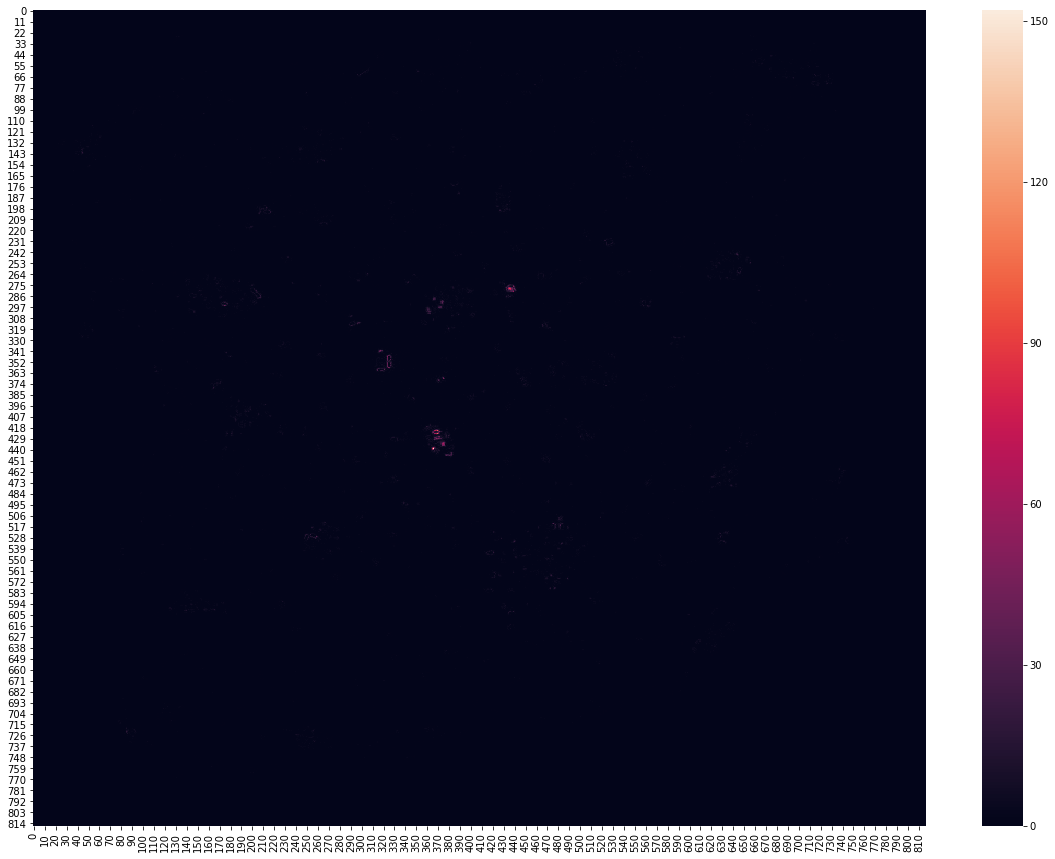

In [66]:
# Miramar
plt.subplots(figsize=(20,15))
sns.heatmap(desert_main_500)

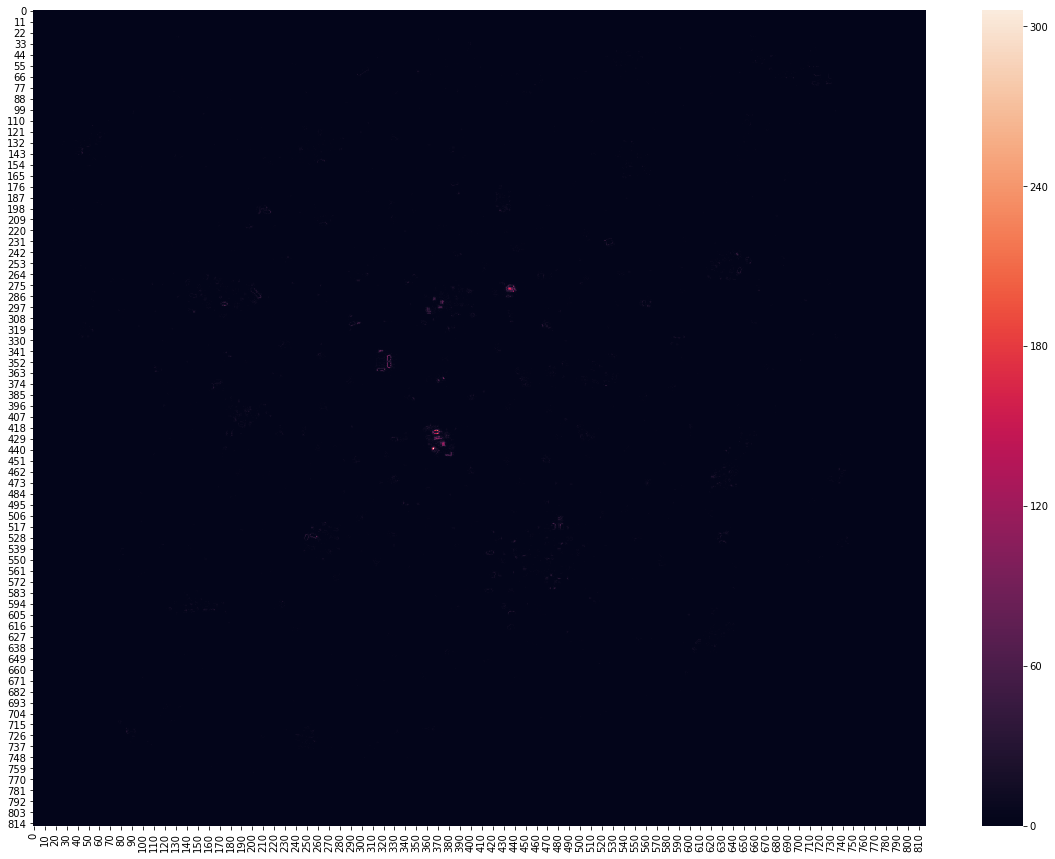

In [67]:
# Miramar
plt.subplots(figsize=(20,15))
sns.heatmap(desert_main_1000)

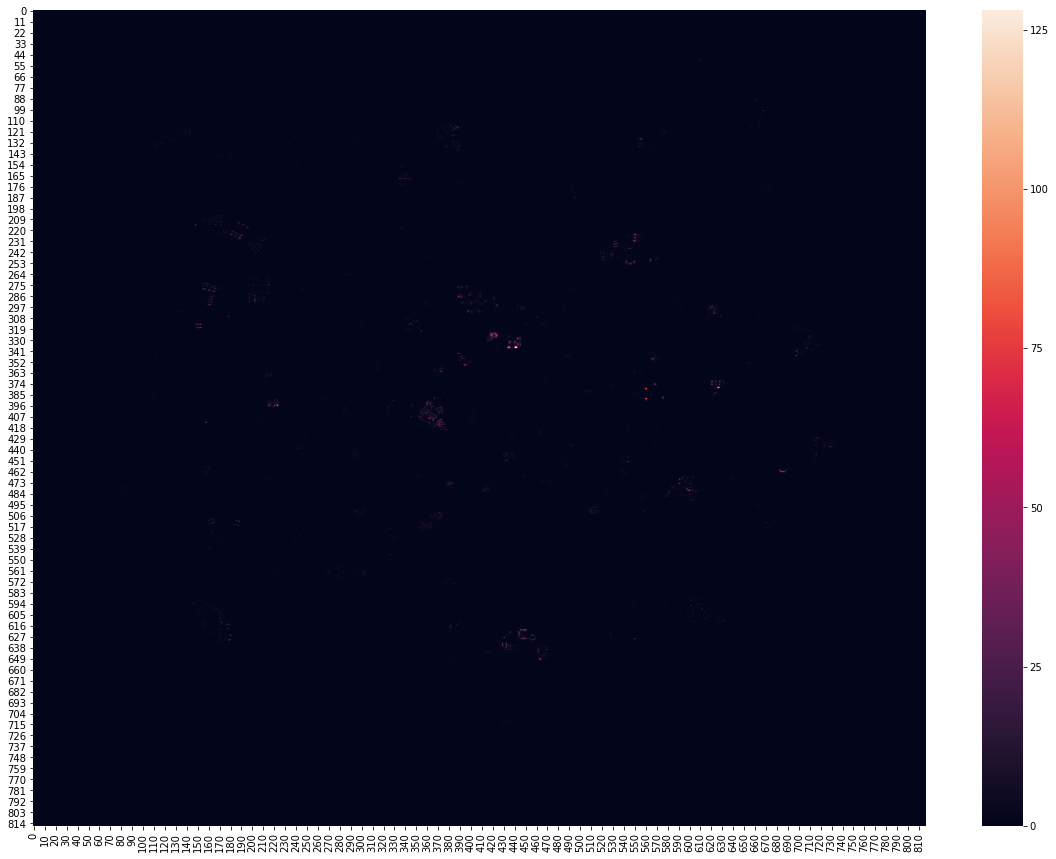

In [68]:
# Erangel Remastered
plt.subplots(figsize=(20,15))
sns.heatmap(baltic_main_500)

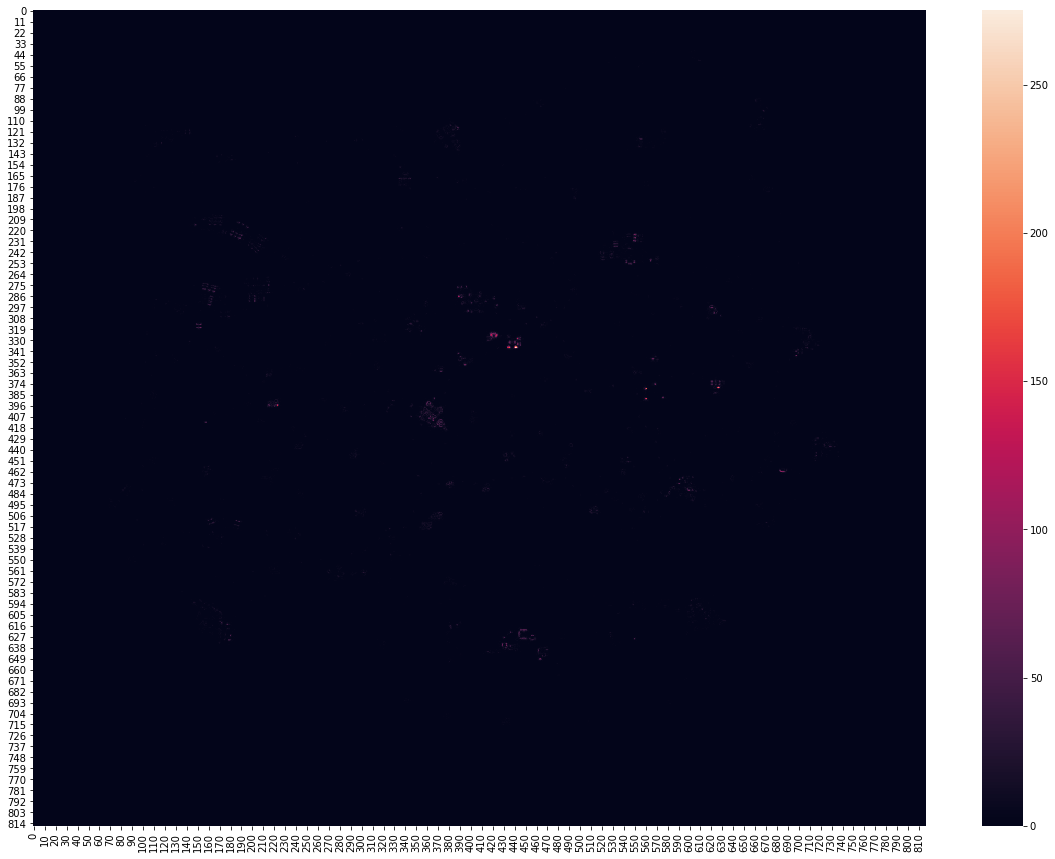

In [69]:
# Erangel Remastered
plt.subplots(figsize=(20,15))
sns.heatmap(baltic_main_1000)

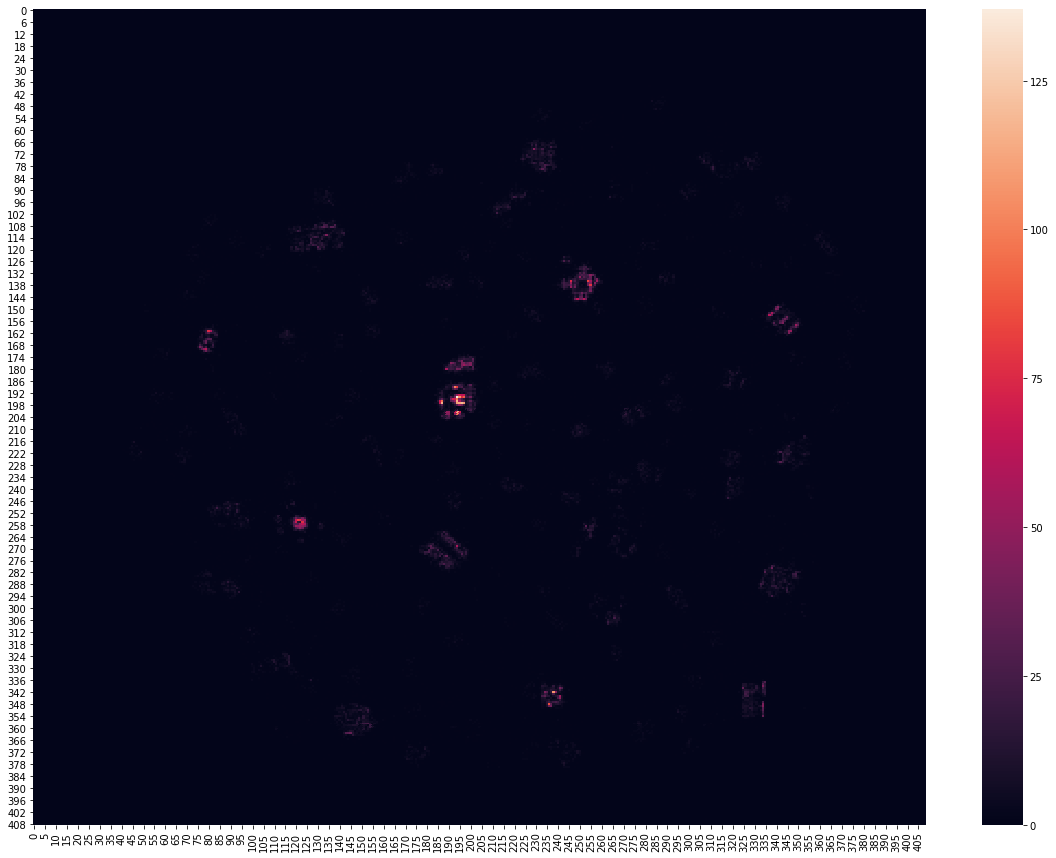

In [70]:
# Sanhok
plt.subplots(figsize=(20,15))
sns.heatmap(savage_main_500)

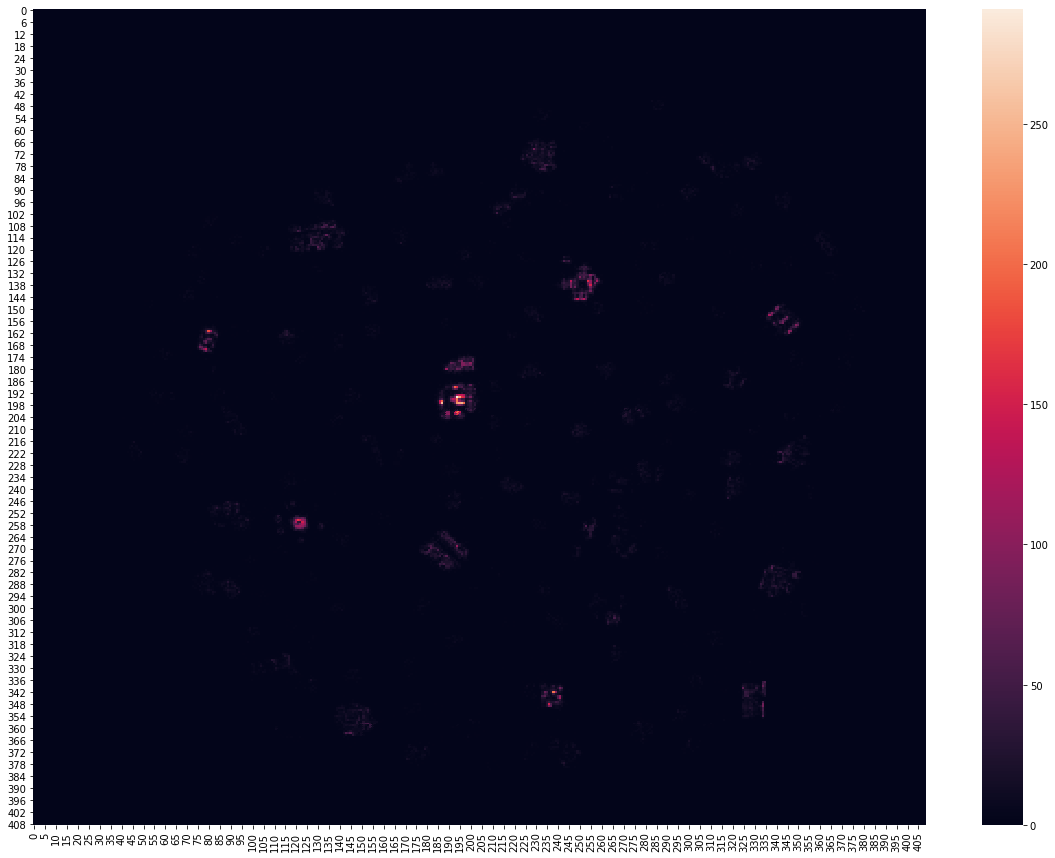

In [71]:
# Sanhok
plt.subplots(figsize=(20,15))
sns.heatmap(savage_main_1000)

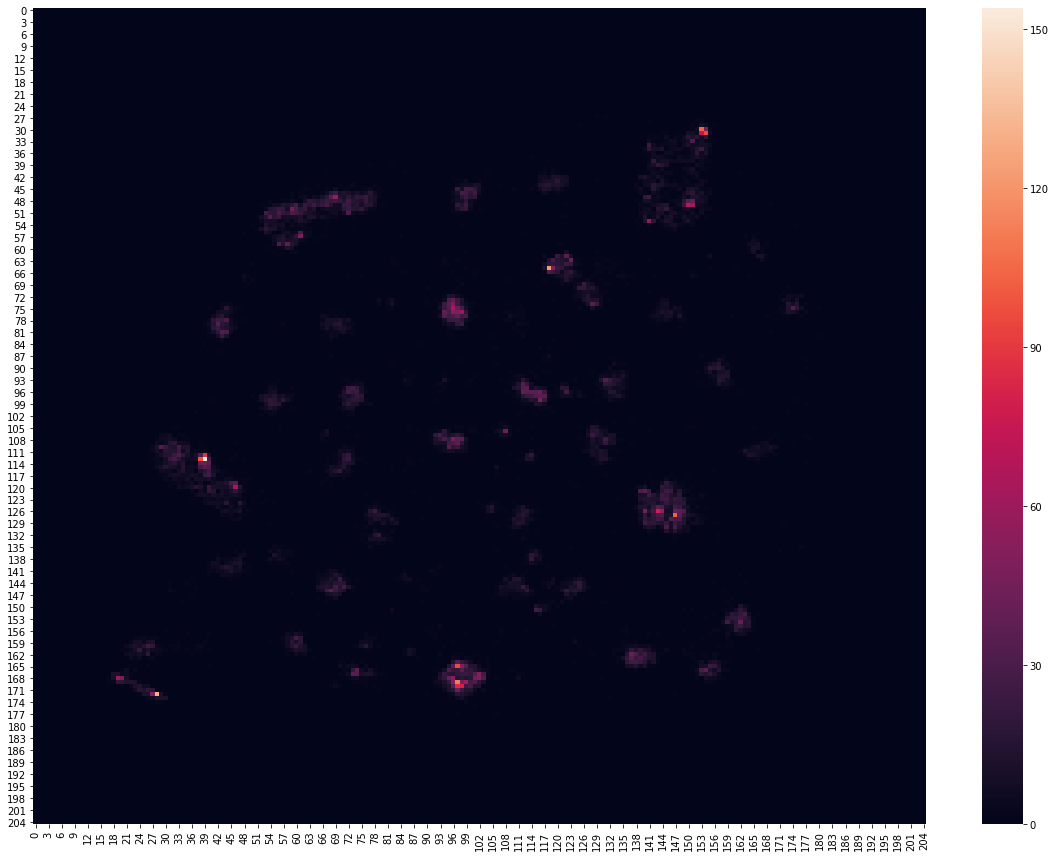

In [74]:
# Karakin
plt.subplots(figsize=(20,15))
sns.heatmap(summerland_main_500)

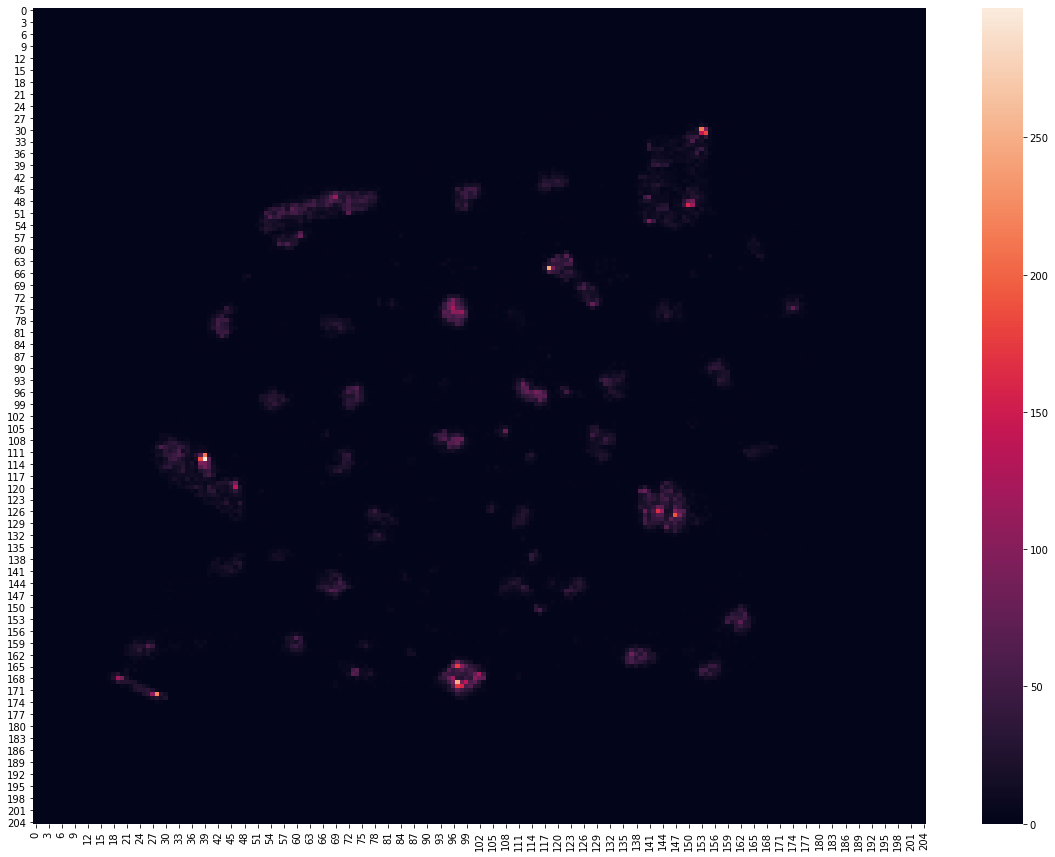

In [13]:
# Karakin
plt.subplots(figsize=(20,15))
sns.heatmap(summerland_main_1000)